In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np


In [ ]:

csv_str = '''exp_folder,Retriever,recall_5,Reranker,Generator,gen_time,query_dataset,r_top,rr_top,M,EM,F1,P,R,Rg-1,Rg-2,Rg-L,BEM,vLLM_solq
/projects/0/gusr0546/research/RAG/final/vllm_3323453,Shitao/RetroMAE_MSMARCO_distill,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:11:31.15,POPQA,50,-,0.38648629704913434,0.0,0.06092947109371708,0.03691673225982411,0.27691417423491443,0.09578956716400089,0.038465346304481514,0.09464543125052105,0.3383137881755829,0.34429102123782157
/projects/0/gusr0546/research/RAG/final/vllm_3402938,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:35.70,KILTWow,50,50,0.0,0.0,0.0912066683140224,0.05986776760330555,0.24493426455495898,0.10625437294427208,0.010839277016347624,0.09452425160042967,0.1624787300825119,0.22920759659463
/projects/0/gusr0546/research/RAG/final/vllm_3268874,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:50.94,KILTWow,50,50,0.0006548788474132286,0.0,0.09390524512789229,0.06145157044907801,0.25342596617003615,0.11089191553592499,0.012486290460390743,0.09862579164570996,0.1689603626728058,0.2554027504911591
/projects/0/gusr0546/research/RAG/final/vllm_3326245,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:11:52.82,POPQA,50,50,0.4211817480899979,7.009182028457279e-05,0.06581599452270956,0.039855699083498626,0.3021772410746967,0.10314922359340574,0.04308704517664445,0.10193259260720289,0.36234188079833984,0.37877619681783137
/projects/0/gusr0546/research/RAG/final/vllm_3268878,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:17.44,WIKIQA,50,50,0.00411522633744856,0.0,0.18112795756573574,0.1329959706355785,0.36812858304482804,0.20467088581218518,0.05890007611785469,0.18001454800301245,0.36188164353370667,0.4279835390946502
/projects/0/gusr0546/research/RAG/final/ad40ee2bbe6bcfc2,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:09:03.02,KILTNQ,-,-,0.1681353542474445,0.0,0.047027657144141685,0.030146793945517166,0.2117107069994838,0.06218319736536626,0.013033626109769339,0.059274417995307235,0.35135334730148315,0.29961226647867467
/projects/0/gusr0546/research/RAG/final/v0_3399265,oracle_provenance,0.0,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:50.53,KILTEli5,50,-,0.0,0.0,0.23028877555083618,0.3358635007094717,0.3075217597253821,0.2121208407842723,0.03585398802664653,0.18917667611714944,0.1543421894311905,0.26808228268082285
/projects/0/gusr0546/research/RAG/final/vllm_3323457,Shitao/RetroMAE_MSMARCO_distill,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:17.91,WIKIQA,50,-,0.00823045267489712,0.0,0.18058048962637605,0.13126220695979215,0.37023849974363915,0.2075838855498104,0.06285930649540797,0.1835342808690413,0.3639773428440094,0.36213991769547327
/projects/0/gusr0546/research/RAG/final/d47a1cea6f1ce9a2,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:07.79,KILTEli5,-,-,0.0,0.0,0.23657456256604384,0.4355470633204939,0.26049101197741914,0.2437520855848961,0.056400982898304586,0.21745274810011977,0.2579086124897003,0.4485733244857332
/projects/0/gusr0546/research/RAG/final/vllm_3326248,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:54.01,truthful_qa,50,50,0.033047735618115054,0.0036719706242350062,0.11501524022157943,0.07304936244806479,0.4293697573615209,0.14170466536874474,0.057302624943535344,0.13201973299177536,0.49630221724510193,0.21297429620563035
/projects/0/gusr0546/research/RAG/final/fa6a537a5d28cf44,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:31:54.42,POPQA,-,-,0.15216934183780753,0.0,0.03179027234393499,0.019350489161387093,0.1280681025476708,0.05012486999008046,0.012540884327299027,0.04913509005662469,0.21111683547496796,0.16990257236980444
/projects/0/gusr0546/research/RAG/final/vllm_3268873,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:46.59,KILTEli5,50,50,0.0,0.0,0.23615615979579438,0.34333700255603145,0.3114930699655161,0.2178060393295866,0.03779024797738553,0.1931036752982165,0.16023540496826172,0.3045786330457863
/projects/0/gusr0546/research/RAG/final/vllm_3269536,naver/splade-v3,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:17.50,WIKIQA,50,-,0.00823045267489712,0.0,0.18815093864259816,0.13703697612864715,0.37898234100863165,0.21136156998065445,0.06100407813221878,0.18289328153863166,0.3778015971183777,0.411522633744856
/projects/0/gusr0546/research/RAG/final/vllm_3288587,bm25,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:55.30,ASQA,50,-,0.3048523206751055,0.0010548523206751054,0.04786559880561388,0.028985303012692445,0.29681645232527976,0.06349791700282449,0.021395172910416427,0.062392428423197255,0.2638990581035614,0.25316455696202533
/projects/0/gusr0546/research/RAG/final/vllm_3323451,Shitao/RetroMAE_MSMARCO_distill,0.24131829241318295,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:44.42,KILTEli5,50,-,0.0,0.0,0.23553683871770043,0.3406664113332227,0.31432373981374984,0.2189607108089609,0.03740812950594608,0.19503800072895242,0.1570250689983368,0.2840079628400796
/projects/0/gusr0546/research/RAG/final/45feaf021caf02d6,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:11:35.84,KILTWow,-,-,0.0,0.0,0.12643477645527154,0.09459722538869068,0.21728647589907124,0.14759819766227503,0.018327150393528585,0.13232212624141457,0.36825424432754517,0.4610347085789129
/projects/0/gusr0546/research/RAG/final/vllm_3288584,bm25,0.4472822527832351,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:38.20,KILTWow,50,-,0.0003274394237066143,0.0,0.09117259589035406,0.059776336151548454,0.24550388196727985,0.10670869942757574,0.010819080146678664,0.09425996385731449,0.15850166976451874,0.21480026195153898
/projects/0/gusr0546/research/RAG/final/vllm_3323448,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:14.35,KILTNQ,50,-,0.3517800493479027,0.0,0.03833148013773524,0.022015134830541915,0.3603969981406029,0.05207004781313655,0.014136952687472608,0.0498920738687898,0.3722459673881531,0.300317236517448
/projects/0/gusr0546/research/RAG/final/1dc3883c520c8b07,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:18:24.44,POPQA,50,50,0.4354103876077662,0.0,0.06411204035599036,0.03785238656903623,0.30215123478423395,0.09490629514713012,0.03544663326903701,0.09283749910714126,0.36391904950141907,0.42202284993341277
/projects/0/gusr0546/research/RAG/final/vllm_3288588,bm25,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:51.15,truthful_qa,50,-,0.028151774785801713,0.0024479804161566705,0.12715700328989143,0.08586427211618698,0.4286775034775094,0.15376690336834484,0.06652559315427645,0.14417971909110802,0.49219974875450134,0.17503059975520197
/projects/0/gusr0546/research/RAG/final/vllm_3326246,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:05.64,SCIQ,50,50,0.391,0.0,0.02151790816181701,0.01152391124936825,0.3433833333333333,0.03380452978132597,0.003825922147921834,0.032900158995326806,0.5762072801589966,0.514
/projects/0/gusr0546/research/RAG/final/69d0cbfcb85c504a,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:39.58,ASQA,-,-,0.18037974683544303,0.0,0.04217474675822037,0.025762655089001805,0.1911922846258289,0.05910029586014385,0.015356691871936721,0.0572111054362844,0.24844138324260712,0.20042194092827004
/projects/0/gusr0546/research/RAG/final/vllm_3268875,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:07.75,SCIQ,50,50,0.415,0.0,0.020485437789165045,0.010898818117497853,0.34841666666666665,0.032769680432635354,0.004000753959291703,0.03243374406968363,0.5604341626167297,0.507
/projects/0/gusr0546/research/RAG/final/vllm_3276584,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:04.11,KILTTriviaqa,50,50,0.6950513538748833,0.005975723622782446,0.10568594587452801,0.0654274468860113,0.5743521876962313,0.13652757221918385,0.05201327264887133,0.13259789361297622,0.4624699056148529,0.5751633986928104
/projects/0/gusr0546/research/RAG/final/vllm_3268872,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:24.39,KILTTriviaqa,50,50,0.7282913165266106,0.005788982259570495,0.10979541048749439,0.06791377308207602,0.5908694656313704,0.1418719788132316,0.05421622182719804,0.13784164828819698,0.4820464253425598,0.6080298786181139
/projects/0/gusr0546/research/RAG/final/v0_3399262,oracle_provenance,0.0,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:16.47,KILTNQ,50,-,0.605981308411215,0.0,0.05689986347653288,0.03270256461812777,0.5226710534802927,0.07775634083669185,0.02830898784686923,0.07529476257422177,0.5505345463752747,0.5300934579439253
/projects/0/gusr0546/research/RAG/final/vllm_3269579,naver/splade-v3,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:12:16.93,POPQA,50,-,0.3979112637555197,0.00014018364056914557,0.062358664233410306,0.03781663557063695,0.28408924023804516,0.09757957171144425,0.040418025543498035,0.09620096955749938,0.34206074476242065,0.35690754888904463
/projects/0/gusr0546/research/RAG/final/vllm_3288580,bm25,0.5312149532710281,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:03.91,KILTNQ,50,-,0.23158265773704617,0.0,0.03149429454084933,0.018351638282880847,0.272077209497765,0.04238073403744178,0.0090976216748042,0.04063256940701415,0.28119203448295593,0.187169545294325
/projects/0/gusr0546/research/RAG/final/vllm_3269530,naver/splade-v3,0.6414637841668659,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:14.26,KILTTriviaqa,50,-,0.6707749766573295,0.004668534080298786,0.10326062994171714,0.06351773110075107,0.559742375064504,0.13299113772621984,0.05071666750797025,0.12977090488149529,0.45325130224227905,0.5510737628384688
/projects/0/gusr0546/research/RAG/final/vllm_3269533,naver/splade-v3,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:05.90,SCIQ,50,-,0.372,0.001,0.021051229906245812,0.01129857918451674,0.31044999999999995,0.03194091833191895,0.004904078207023284,0.03157182335765606,0.5349946022033691,0.463
/projects/0/gusr0546/research/RAG/final/vllm_3269529,naver/splade-v3,0.6446428571428572,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:29.79,KILTHotpotqa,50,-,0.2882142857142857,0.00017857142857142857,0.04353364302846008,0.02562968597573527,0.27638091440416185,0.05676003020015953,0.019874595323544787,0.05556252499303806,0.5238190293312073,0.32517857142857143
/projects/0/gusr0546/research/RAG/final/vllm_3277196,bm25,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:12:33.51,POPQA,50,50,0.3405060629424546,0.00014018364056914557,0.05294135101000952,0.03222837351362656,0.24227949725251186,0.08257965779364022,0.032061239910086636,0.08123340130337477,0.3025420606136322,0.31036658022008834
/projects/0/gusr0546/research/RAG/final/vllm_3276582,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:23.04,KILTNQ,50,50,0.36587945012336975,0.0,0.03821641990753237,0.021891443297568473,0.3703930739605943,0.051983947910053806,0.013723213462102377,0.049859014482415885,0.38083070516586304,0.2982023264011279
/projects/0/gusr0546/research/RAG/final/vllm_3276583,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:21.29,KILTHotpotqa,50,50,0.31464285714285717,0.0005357142857142857,0.047685770206942736,0.028326571096382515,0.2908120601425762,0.06251734228528547,0.023516226010061366,0.061335803869615,0.5428314208984375,0.3608928571428571
/projects/0/gusr0546/research/RAG/final/5b38f7a4de42d816,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:02:54.33,truthful_qa,-,-,0.03427172582619339,0.0,0.20383733596810644,0.14092740580123678,0.46494780057912716,0.2524120476048557,0.138476251461757,0.2384617536361091,0.6218029856681824,0.26193390452876375
/projects/0/gusr0546/research/RAG/final/vllm_3288583,bm25,0.13238221632382216,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:43.70,KILTEli5,50,-,0.0,0.0,0.23337195761659,0.34102045520994606,0.3114118738923364,0.2154912318489208,0.03639074656710768,0.1920149292724979,0.1581699699163437,0.23291307232913072
/projects/0/gusr0546/research/RAG/final/vllm_3323450,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:19.75,KILTTriviaqa,50,-,0.6044817927170868,0.0028011204481792717,0.09388876142781767,0.05763068658432552,0.5198401820621297,0.12229805562653547,0.04364036294114603,0.11932498540438792,0.4180108308792114,0.47992530345471524
/projects/0/gusr0546/research/RAG/final/v0_3399264,oracle_provenance,0.0,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:02:34.84,KILTTriviaqa,50,-,0.7000933706816059,0.0009337068160597573,0.09170968859106553,0.05501817990128622,0.574552238403779,0.12017522480522216,0.04404474814858837,0.11689867200895455,0.4590635299682617,0.5477124183006536
/projects/0/gusr0546/research/RAG/final/vllm_3405317,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:49.25,KILTWow,50,50,0.0,0.0,0.0925181403503137,0.060537280728768565,0.2511753780391341,0.1089275749693585,0.011715374405246871,0.09710851564374441,0.16538704931735992,0.23804846103470859
/projects/0/gusr0546/research/RAG/final/vllm_3323456,Shitao/RetroMAE_MSMARCO_distill,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:53.47,truthful_qa,50,-,0.023255813953488372,0.0,0.12141333443006179,0.07878644636112898,0.4314669299371213,0.14913123901980377,0.06088113722942526,0.1388622820022433,0.4883231520652771,0.20807833537331702
/projects/0/gusr0546/research/RAG/final/vllm_3323455,Shitao/RetroMAE_MSMARCO_distill,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:57.14,ASQA,50,-,0.4409282700421941,0.0010548523206751054,0.06024810844386155,0.03538568356382837,0.4151888547458168,0.07893610131935286,0.030642575421040125,0.0772466510214712,0.31949788331985474,0.3691983122362869
/projects/0/gusr0546/research/RAG/final/vllm_3268876,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:58.00,ASQA,50,50,0.5284810126582279,0.002109704641350211,0.07296072682155377,0.043233131697994046,0.4784229805590565,0.09649721893747566,0.03926527522130027,0.09544289786306605,0.375580757856369,0.44936708860759494
/projects/0/gusr0546/research/RAG/final/vllm_3276589,bm25,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:55.78,ASQA,50,50,0.43143459915611815,0.0010548523206751054,0.059740698178412543,0.035087403438650695,0.3933138679182983,0.08125023299190104,0.028985368410324293,0.07981586731192944,0.3295258581638336,0.3850210970464135
/projects/0/gusr0546/research/RAG/final/vllm_3268871,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:34.20,KILTHotpotqa,50,50,0.3151785714285714,0.0007142857142857143,0.04693918281083169,0.02802804157447375,0.2906361420127798,0.06109550203596192,0.022116351148808694,0.059777993670493246,0.5409921407699585,0.36339285714285713
/projects/0/gusr0546/research/RAG/final/vllm_3269534,naver/splade-v3,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:58.61,ASQA,50,-,0.4588607594936709,0.0,0.057394673981762706,0.03281015447341487,0.42147971578351323,0.07689482849770335,0.02802334425624788,0.07507415387691468,0.33314862847328186,0.399789029535865
/projects/0/gusr0546/research/RAG/final/ba48f5b5651e47af,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:17:51.37,KILTHotpotqa,-,-,0.165,0.0,0.03438249967011202,0.02008691679033134,0.17477419981533895,0.04909788528929161,0.015521374924870684,0.04828402085874577,0.517870306968689,0.3492857142857143
/projects/0/gusr0546/research/RAG/final/vllm_3326241,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:30.00,KILTHotpotqa,50,50,0.2860714285714286,0.0007142857142857143,0.04461940711314917,0.02669488070989171,0.27203496945950506,0.0582219310768403,0.021833588673754036,0.05712834503900219,0.521623432636261,0.32857142857142857
/projects/0/gusr0546/research/RAG/final/vllm_3326240,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:11.27,KILTNQ,50,50,0.4173422629538245,0.0,0.04187063366550734,0.02403205754701771,0.4070444381421137,0.05747273813271738,0.016180109706220545,0.055185301940637255,0.42270880937576294,0.3560098695805428
/projects/0/gusr0546/research/RAG/final/vllm_3326243,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:42.11,KILTEli5,50,50,0.0,0.0,0.2347899345321288,0.3423068719094875,0.3133852952738069,0.21763355819777044,0.03748237465372569,0.19367299565225454,0.15704655647277832,0.3291307232913072
/projects/0/gusr0546/research/RAG/final/vllm_3269532,naver/splade-v3,0.68762278978389,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:59.49,KILTWow,50,-,0.0009823182711198428,0.0,0.09359788071792009,0.060712246927629665,0.25481247284974434,0.10984945520135793,0.012414055953055492,0.09822714772149997,0.17023074626922607,0.26751800916830387
/projects/0/gusr0546/research/RAG/final/vllm_3269528,naver/splade-v3,0.7985046728971963,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:20.56,KILTNQ,50,-,0.3708142403947832,0.00035248501938667606,0.04035803648602787,0.023421793681043388,0.3798191451416652,0.05431183392303029,0.015175253088874623,0.052296692229913726,0.3848375380039215,0.3193514275643285
/projects/0/gusr0546/research/RAG/final/vllm_3269535,naver/splade-v3,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:55.15,truthful_qa,50,-,0.028151774785801713,0.0012239902080783353,0.11805294564500421,0.07536809481705804,0.4310914878399922,0.14481419105388052,0.05948378958038909,0.1353707855218388,0.49018970131874084,0.21664626682986537
/projects/0/gusr0546/research/RAG/final/vllm_3269531,naver/splade-v3,0.2402123424021234,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:44.79,KILTEli5,50,-,0.0,0.0,0.2360317257665168,0.34314130099717693,0.3119071458050429,0.2177797505017187,0.038134590232662934,0.19402465520153173,0.1595916599035263,0.28798938287989384
/projects/0/gusr0546/research/RAG/final/vllm_3276590,bm25,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:52.99,truthful_qa,50,50,0.028151774785801713,0.0024479804161566705,0.12201382750832543,0.07919791125530964,0.4363887634028855,0.14985686773304782,0.06331953514871588,0.14010475729042715,0.5066537261009216,0.1799265605875153
/projects/0/gusr0546/research/RAG/final/vllm_3288582,bm25,0.5075137664493408,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:09.31,KILTTriviaqa,50,-,0.6028011204481792,0.002240896358543417,0.0968749630120535,0.059344935234737224,0.5166299023075263,0.12413023709452006,0.04416615362609462,0.12072462436244888,0.4221409857273102,0.47992530345471524
/projects/0/gusr0546/research/RAG/final/vllm_3276585,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:41.93,KILTEli5,50,50,0.0,0.0,0.23526435028166248,0.3430486462949701,0.31691670537332023,0.21798116409951607,0.0369174800711568,0.1934704480883093,0.16045653820037842,0.2733908427339084
/projects/0/gusr0546/research/RAG/final/vllm_3288586,bm25,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:03.62,SCIQ,50,-,0.3,0.0,0.016760586849069205,0.008900893183585811,0.2675666666666667,0.02720503245122528,0.0030157818207736005,0.02692305997910762,0.4806770086288452,0.353
/projects/0/gusr0546/research/RAG/final/vllm_3326247,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:57.74,ASQA,50,50,0.5147679324894515,0.0,0.06870602536309796,0.039961478470817186,0.4631420823667659,0.09093303030337212,0.036234056271693925,0.08925015710423131,0.3560291826725006,0.4525316455696203
/projects/0/gusr0546/research/RAG/final/a28f3abdf18084a7,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:29.95,SCIQ,-,-,0.221,0.0,0.020989057452687376,0.01134948546894416,0.19355,0.03728701661008732,0.004373167222085097,0.036098605169235104,0.5101427435874939,0.526
/projects/0/gusr0546/research/RAG/final/vllm_3326249,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:17.76,WIKIQA,50,50,0.00823045267489712,0.0,0.18182901542709315,0.13863335307191546,0.359190649566025,0.2055039723708752,0.05712329863027656,0.17734228703396834,0.34321340918540955,0.38271604938271603
/projects/0/gusr0546/research/RAG/final/8649e6d7eac246a6,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:17:11.65,KILTTriviaqa,-,-,0.3204481792717087,0.0,0.0752355671781986,0.04470618954427907,0.34896656622641137,0.10263401904765068,0.029440339910742387,0.09957601272909858,0.40232428908348083,0.4466853408029879
/projects/0/gusr0546/research/RAG/final/vllm_3276588,bm25,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:03.62,SCIQ,50,50,0.37,0.0,0.0198569107391064,0.01065651212837092,0.31155,0.03110844493062141,0.00403554530625811,0.030281100418752725,0.5489230155944824,0.446
/projects/0/gusr0546/research/RAG/final/vllm_3276591,bm25,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:16.54,WIKIQA,50,50,0.00411522633744856,0.0,0.17242250522978023,0.12982651423555136,0.34896350607611065,0.19551525457443433,0.056164251342521704,0.1700005527974123,0.3503980338573456,0.3292181069958848
/projects/0/gusr0546/research/RAG/final/vllm_3323452,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:49.87,KILTWow,50,-,0.0,0.0,0.09330989561624004,0.0610355333772641,0.25345251899277355,0.10952722555396312,0.012540220066834591,0.09794820810153097,0.1648741364479065,0.24197773411918794
/projects/0/gusr0546/research/RAG/final/vllm_3288589,bm25,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:17.59,WIKIQA,50,-,0.00411522633744856,0.0,0.15873212383628812,0.11904350426931432,0.31428207264929164,0.1737780333707521,0.03672605174992694,0.1491562433823335,0.26478707790374756,0.19753086419753085
/projects/0/gusr0546/research/RAG/final/vllm_3288581,bm25,0.5802678571428571,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:18.37,KILTHotpotqa,50,-,0.2860714285714286,0.0008928571428571428,0.04413604836732821,0.026475178002166463,0.2645749660602187,0.05751657537232891,0.02080024191242816,0.05652935036209224,0.5124279856681824,0.32160714285714287
/projects/0/gusr0546/research/RAG/final/vllm_3323454,Shitao/RetroMAE_MSMARCO_distill,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:04.99,SCIQ,50,-,0.372,0.001,0.019262373244413582,0.010361069798712598,0.30884999999999996,0.030657394492936432,0.0033553465797922567,0.03002802957929946,0.537803590297699,0.436
/projects/0/gusr0546/research/RAG/final/vllm_3268870,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:03:15.86,KILTNQ,50,50,0.43672893902009163,0.0,0.04364687154832909,0.025180616986951666,0.4190817817787873,0.05978079760841209,0.01754683260355502,0.05768934296037037,0.4304598569869995,0.3641170250264364
/projects/0/gusr0546/research/RAG/final/vllm_3268877,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:00:53.94,truthful_qa,50,50,0.037943696450428395,0.0012239902080783353,0.12192284988768655,0.07860525976432456,0.4374009953105624,0.14895252330675576,0.060974604599843704,0.13886941863370061,0.5088986754417419,0.21664626682986537
/projects/0/gusr0546/research/RAG/final/vllm_3323449,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:32.27,KILTHotpotqa,50,-,0.2546428571428571,0.0007142857142857143,0.03994273215185867,0.023554320031314527,0.25103734562850416,0.05195585475927079,0.017734023850770865,0.05102730235126562,0.4923124611377716,0.28625
/projects/0/gusr0546/research/RAG/final/vllm_3326242,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:05:14.05,KILTTriviaqa,50,50,0.6788048552754435,0.004668534080298786,0.10422438497812028,0.06467436997857001,0.5660540916703382,0.13345918140954802,0.05066948989336605,0.1298297503306928,0.45808038115501404,0.5676937441643324
/projects/0/gusr0546/research/RAG/final/vllm_3288585,bm25,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:11:55.98,POPQA,50,-,0.2927735333286605,0.00014018364056914557,0.047879942250985456,0.02923672378706024,0.21039828842450276,0.0742128455522055,0.027247585148295006,0.07301081885551886,0.2711508274078369,0.2754608537183711
/projects/0/gusr0546/research/RAG/final/v0_3399263,oracle_provenance,0.0,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:02:31.70,KILTHotpotqa,50,-,0.5391071428571429,0.00035714285714285714,0.06731776709781268,0.03900079280799083,0.44324274823335663,0.08942792682408483,0.037847914962950015,0.08838074604203895,0.726164698600769,0.5857142857142857
/projects/0/gusr0546/research/RAG/final/0b5654b3682dc4df,,,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:04.02,WIKIQA,-,-,0.0,0.0,0.21573278867660226,0.20693678534158214,0.27287408017515086,0.24164882514386948,0.05908694090853072,0.20956098080911262,0.3964114785194397,0.46502057613168724
/projects/0/gusr0546/research/RAG/final/v0_3399266,oracle_provenance,0.0,,TinyLlama/TinyLlama-1.1B-Chat-v1.0,00:01:43.02,KILTWow,50,-,0.0006548788474132286,0.0,0.10313177299457624,0.06543196584791883,0.2896155650412889,0.12176689991038521,0.01880397493451301,0.10904119381721708,0.23324938118457794,0.320890635232482
/projects/0/gusr0546/research/RAG/final/vllm_3267789,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:11.67,SCIQ,50,50,0.618,0.001,0.03244373955494392,0.017362695499658062,0.44038333333333335,0.05017422285640528,0.007365734312580828,0.04939445994532717,0.7712308168411255,0.872
/projects/0/gusr0546/research/RAG/final/668e7568155fc439,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:11:02.60,WIKIQA,-,-,0.00411522633744856,0.0,0.23524527590189484,0.27933351885765767,0.2596389447113961,0.2668754156459908,0.07820708030418957,0.22682567845068385,0.4883882999420166,0.8930041152263375
/projects/0/gusr0546/research/RAG/final/vllm_3267788,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,01:24:47.90,POPQA,50,50,0.712062802270975,0.0,0.07916965075566346,0.04571283280722034,0.5189155849718687,0.11780464961337486,0.04922662033299041,0.11647869510277321,0.522589921951294,0.6312469334828625
/projects/0/gusr0546/research/RAG/final/vllm_3288568,bm25,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:15.57,SCIQ,50,-,0.519,0.001,0.030526628832740443,0.016480062210465884,0.38188333333333335,0.04650651199244288,0.008026790421193924,0.04583703822323044,0.6740842461585999,0.746
/projects/0/gusr0546/research/RAG/final/vllm_3267086,naver/splade-v3,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:41.32,ASQA,50,-,0.7215189873417721,0.0,0.09498028057373208,0.05423845362362468,0.6232632990544382,0.12122166752983071,0.056441004001710426,0.11900054016649632,0.5005027055740356,0.7637130801687764
/projects/0/gusr0546/research/RAG/final/vllm_3326261,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:32.27,KILTEli5,50,50,0.0,0.0,0.23497213880371676,0.33993999502776645,0.3174687492732234,0.22383778003532173,0.040496387227736914,0.2008970321617866,0.16644009947776794,0.6257465162574651
/projects/0/gusr0546/research/RAG/final/vllm_3276420,bm25,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:33.54,WIKIQA,50,50,0.00411522633744856,0.0,0.2352693745429658,0.2001454445904462,0.3847654566265562,0.259776548684633,0.0917344026739253,0.22474610567976944,0.47700756788253784,0.7901234567901234
/projects/0/gusr0546/research/RAG/final/vllm_3267782,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:17:41.77,KILTNQ,50,50,0.701797673598872,0.0,0.09572029854565382,0.05782903337901053,0.5968145757557508,0.12214312047427893,0.05048409286541248,0.11820807714407361,0.7036431431770325,0.7980260838914346
/projects/0/gusr0546/research/RAG/final/591beabdccb299b0,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:34:47.67,ASQA,-,-,0.5274261603375527,0.013713080168776372,0.1265950385894559,0.08187968866782402,0.4591788368687103,0.16290187255292427,0.07170753669566982,0.15884734189289912,0.40877529978752136,0.689873417721519
/projects/0/gusr0546/research/RAG/final/v0_3265266,oracle_provenance,0.0,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:55.28,KILTWow,50,-,0.0016371971185330713,0.0,0.1476577734255638,0.10855562616387933,0.2832295106188003,0.1656599838334923,0.03492204282867857,0.14804426926384956,0.3190244734287262,0.7472167648984938
/projects/0/gusr0546/research/RAG/final/vllm_3402939,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:21:23.03,KILTWow,50,50,0.0006548788474132286,0.0,0.11454847572668618,0.0792056625794391,0.26151384656492355,0.1294794749669975,0.019544710363861066,0.11566005174445229,0.23297767341136932,0.5579567779960707
/projects/0/gusr0546/research/RAG/final/vllm_3323475,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:22:31.62,KILTWow,50,-,0.0003274394237066143,0.0,0.1142599482764489,0.07770620269822498,0.2703845698519789,0.12909862731603222,0.019409792942835003,0.1161722522545628,0.22536225616931915,0.6123117223313687
/projects/0/gusr0546/research/RAG/final/vllm_3405897,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:22:55.72,KILTWow,50,50,0.0009823182711198428,0.0,0.11480368076303009,0.07780699420723743,0.2730770418829192,0.12939134923522128,0.020094970003628657,0.11621676009773817,0.2279040366411209,0.6093647675180092
/projects/0/gusr0546/research/RAG/final/vllm_3288562,bm25,0.5312149532710281,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:17:43.52,KILTNQ,50,-,0.49841381741276,0.0,0.07250628341726018,0.043633549737396485,0.44560501055034024,0.09303350419637328,0.034882229641833414,0.08985930823124558,0.5332551002502441,0.5738456115615086
/projects/0/gusr0546/research/RAG/final/c33166f66c610efa,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,02:26:02.28,KILTTriviaqa,-,-,0.8052287581699347,0.08571428571428572,0.19863052648163879,0.14255066567387062,0.5764974110063911,0.2756017016628374,0.11571966545358688,0.27149233936762546,0.5679513216018677,0.8102707749766573
/projects/0/gusr0546/research/RAG/final/vllm_3326267,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:33.88,WIKIQA,50,50,0.00411522633744856,0.0,0.25250763068357884,0.21570823245677773,0.405953716020928,0.27993095182239264,0.10626216971340156,0.24294814160969283,0.5193575024604797,0.8847736625514403
/projects/0/gusr0546/research/RAG/final/vllm_3323480,Shitao/RetroMAE_MSMARCO_distill,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:32.90,WIKIQA,50,-,0.00411522633744856,0.0,0.251754387972786,0.21404506740324944,0.40829749522270997,0.28410098561484687,0.11029298710959319,0.25200745966406357,0.5295157432556152,0.8724279835390947
/projects/0/gusr0546/research/RAG/final/vllm_3276412,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:34:27.80,KILTHotpotqa,50,50,0.5296428571428572,0.0,0.06449030732047896,0.03671092806486347,0.41361942289721065,0.08417389645995527,0.03330503414591336,0.08289913823050103,0.7164844870567322,0.6130357142857142
/projects/0/gusr0546/research/RAG/final/vllm_3288564,bm25,0.5075137664493408,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:32:21.70,KILTTriviaqa,50,-,0.8446311858076564,0.00018674136321195143,0.11463404547905694,0.06736135225923565,0.6398318047757823,0.14694713828398767,0.05778377243417696,0.14317369926652918,0.5630271434783936,0.7886087768440709
/projects/0/gusr0546/research/RAG/final/vllm_3276417,bm25,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:17.79,SCIQ,50,50,0.599,0.0,0.032312203357554435,0.01715386998097221,0.44285,0.05028102498463303,0.006352897961753348,0.049722829749306655,0.7467151880264282,0.836
/projects/0/gusr0546/research/RAG/final/vllm_3276414,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:24.19,KILTEli5,50,50,0.0,0.0,0.2308809801646377,0.33966941554351043,0.31159386455101146,0.22210295505064798,0.03951727740374511,0.19961572424736326,0.16654039919376373,0.49502322495023227
/projects/0/gusr0546/research/RAG/final/vllm_3267079,naver/splade-v3,0.7985046728971963,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:17:47.25,KILTNQ,50,-,0.6743038420867113,0.0,0.09510029151363639,0.05792029448420693,0.567681979814029,0.12187741111928774,0.05050386063557823,0.11746561020930454,0.6771305799484253,0.7698272823405006
/projects/0/gusr0546/research/RAG/final/vllm_3276411,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:17:25.11,KILTNQ,50,50,0.6231935142756433,0.0,0.08859012902734179,0.053591482150550776,0.5381296498294119,0.1134533768445862,0.04601175726334746,0.10959761782148619,0.640201210975647,0.7155445893549525
/projects/0/gusr0546/research/RAG/final/65d7d32c5a5b009c,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,01:36:56.93,KILTEli5,-,-,0.0,0.0,0.22214790002707202,0.3807730242676844,0.260314785875738,0.22724928375364112,0.043728594975052666,0.20239292745284862,0.19909869134426117,0.807564698075647
/projects/0/gusr0546/research/RAG/final/vllm_3326259,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:31:34.62,KILTTriviaqa,50,50,0.9146591970121382,0.00037348272642390287,0.12196379443734383,0.0719906885165242,0.6815629639579219,0.15647388067916482,0.06136365967489924,0.15206427728739,0.5920236110687256,0.8774976657329598
/projects/0/gusr0546/research/RAG/final/vllm_3323473,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:31:57.89,KILTTriviaqa,50,-,0.8580765639589168,0.00037348272642390287,0.11670190184798249,0.06878013127994263,0.6528980413714308,0.14975007452680003,0.05923122426195182,0.14590308871771857,0.5659649968147278,0.8110177404295051
/projects/0/gusr0546/research/RAG/final/vllm_3277226,bm25,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,01:27:06.41,POPQA,50,50,0.5081656970631527,0.0,0.0600570742995956,0.034982227881348645,0.3627220547806515,0.08954579553944707,0.03595739601095836,0.08826246183707671,0.3795650601387024,0.4632368402607416
/projects/0/gusr0546/research/RAG/final/3072be698050fd25,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,01:41:07.36,KILTNQ,-,-,0.44448360944659854,0.020091646105040536,0.11781052500144518,0.08285924331210229,0.38741914673293554,0.15180040545919826,0.05522671284999872,0.14643284399524198,0.5506449341773987,0.6591469862530842
/projects/0/gusr0546/research/RAG/final/vllm_3267087,naver/splade-v3,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:25.52,truthful_qa,50,-,0.04528763769889841,0.0012239902080783353,0.13432103995181588,0.08172112879848915,0.4850062489027494,0.16301725012758386,0.07057364995182029,0.15170317809977438,0.5499701499938965,0.5312117503059975
/projects/0/gusr0546/research/RAG/final/vllm_3288567,bm25,,,Upstage/SOLAR-10.7B-Instruct-v1.0,01:23:02.04,POPQA,50,-,0.41017733230531994,0.0,0.05054907341687092,0.02957465846739304,0.2907932168919062,0.07548228270806163,0.02944010467393048,0.07432697006515893,0.31203553080558777,0.38606574612742695
/projects/0/gusr0546/research/RAG/final/df46951db128b0af,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,08:08:40.52,POPQA,-,-,0.30721244830728256,0.032312329151188056,0.07976736234692851,0.057233893331812884,0.2446085761236108,0.11536800530747435,0.05344431420682737,0.11429647511427594,0.28651943802833557,0.3921637344921848
/projects/0/gusr0546/research/RAG/final/vllm_3326265,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:38.93,ASQA,50,50,0.7426160337552743,0.0,0.09496090782970733,0.0540082385473948,0.6534033067260916,0.12366085114407244,0.05720414801808227,0.12112977416910005,0.5074940323829651,0.7858649789029536
/projects/0/gusr0546/research/RAG/final/vllm_3326263,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,01:27:29.11,POPQA,50,50,0.7201934534239854,7.009182028457279e-05,0.07927850434833873,0.045698143706310645,0.5255416261969846,0.11803740274712428,0.04920791466034291,0.11659595103844235,0.5271121859550476,0.6315973925842854
/projects/0/gusr0546/research/RAG/final/vllm_3288570,bm25,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:01.06,truthful_qa,50,-,0.04039167686658507,0.0,0.14163269507901832,0.08839273102420397,0.4702922809927917,0.1719187587716447,0.07474849354180661,0.1585811290810361,0.5359883904457092,0.43451652386780903
/projects/0/gusr0546/research/RAG/final/v0_3400162,oracle_provenance,0.0,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:12:46.68,KILTHotpotqa,50,-,0.7928571428571428,0.0,0.10282248870684864,0.05937554504586716,0.5540808734739449,0.1350453100309295,0.06172193392490634,0.13328355194384744,0.9263772368431091,0.8914285714285715
/projects/0/gusr0546/research/RAG/final/vllm_3288565,bm25,0.13238221632382216,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:18.33,KILTEli5,50,-,0.0,0.0,0.22403239382307136,0.34080457048948665,0.29939899148370547,0.21809338548006157,0.038094087591231514,0.19470597432862552,0.1649889200925827,0.3676177836761778
/projects/0/gusr0546/research/RAG/final/vllm_3267112,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:39.16,KILTEli5,50,50,0.0,0.0,0.23425181287941874,0.34035129554473653,0.31532993190922276,0.22359338117992733,0.040374831820903595,0.2003063724887057,0.1741369217634201,0.6257465162574651
/projects/0/gusr0546/research/RAG/final/vllm_3288563,bm25,0.5802678571428571,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:35:28.04,KILTHotpotqa,50,-,0.4807142857142857,0.0,0.05930411497982838,0.03382428468011737,0.3887086382008637,0.07636907258037089,0.029692616427883352,0.07508943397785148,0.673012375831604,0.5326785714285714
/projects/0/gusr0546/research/RAG/final/v0_3265265,oracle_provenance,0.0,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:03:40.36,KILTEli5,50,-,0.0,0.0,0.22319835255304935,0.3491509332375365,0.2843893213855168,0.2187728324984139,0.03916939057732457,0.19471097531708614,0.17951849102973938,0.3861977438619774
/projects/0/gusr0546/research/RAG/final/vllm_3267088,naver/splade-v3,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:36.06,WIKIQA,50,-,0.00411522633744856,0.0,0.25735904653900377,0.22458420450581432,0.40722360645648,0.28606516208854105,0.11288496457311258,0.24633897548270758,0.5369163751602173,0.9135802469135802
/projects/0/gusr0546/research/RAG/final/vllm_3323476,Shitao/RetroMAE_MSMARCO_distill,,,Upstage/SOLAR-10.7B-Instruct-v1.0,01:20:52.38,POPQA,50,-,0.6601948552603911,0.0,0.07708888415316113,0.0446952089689755,0.484277403398452,0.11360537757555578,0.047143013139037286,0.11229585152742622,0.4898090958595276,0.5788883437302866
/projects/0/gusr0546/research/RAG/final/v0_3400161,oracle_provenance,0.0,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:04:24.45,KILTNQ,50,-,0.8291588785046728,0.0,0.15109928684722307,0.09657624945608591,0.6435297517699043,0.18888152240947959,0.08885117909821268,0.1829553189449496,0.7958546280860901,0.8642990654205608
/projects/0/gusr0546/research/RAG/final/vllm_3267081,naver/splade-v3,0.6414637841668659,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:31:09.49,KILTTriviaqa,50,-,0.9111111111111111,0.00037348272642390287,0.12222335375948715,0.07206505679362565,0.67826688251058,0.15664434425241738,0.062210338638585945,0.1523496580685828,0.5947905778884888,0.8679738562091504
/projects/0/gusr0546/research/RAG/final/vllm_3288569,bm25,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:50.05,ASQA,50,-,0.5168776371308017,0.0,0.06815275513198277,0.03883595228505408,0.47951459288484605,0.08858111221594361,0.036058285150913603,0.08642740315191563,0.3795355260372162,0.5537974683544303
/projects/0/gusr0546/research/RAG/final/3d77fa7a142dd164,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,03:38:48.78,KILTHotpotqa,-,-,0.3507142857142857,0.005892857142857143,0.0719641439665159,0.04511146011541549,0.2931627443057949,0.0902936783298409,0.03533751606728579,0.08899232356536714,0.6054317951202393,0.5008928571428571
/projects/0/gusr0546/research/RAG/final/vllm_3323472,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:35:20.67,KILTHotpotqa,50,-,0.44589285714285715,0.0,0.05666318070196956,0.03226948450965877,0.37062449819748167,0.07337643698704306,0.028154130515142033,0.0722182431718569,0.6496648192405701,0.4928571428571429
/projects/0/gusr0546/research/RAG/final/vllm_3267790,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:38.73,ASQA,50,50,0.7616033755274262,0.0,0.0977814663240678,0.05543589417518589,0.6592954484568407,0.12657489887248818,0.058869224980109026,0.12445045855996803,0.5276837348937988,0.8111814345991561
/projects/0/gusr0546/research/RAG/final/vllm_3267110,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:35:25.43,KILTHotpotqa,50,50,0.53875,0.0,0.06569138457839342,0.037489078415064075,0.42374047740875886,0.08569305266850354,0.0337188153233978,0.08417193438468361,0.7237607836723328,0.6367857142857143
/projects/0/gusr0546/research/RAG/final/v0_3265264,oracle_provenance,0.0,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:12:49.23,KILTTriviaqa,50,-,0.9043884220354809,0.00018674136321195143,0.13141900317943125,0.0785278645051192,0.6544297584353607,0.16954826219895533,0.06785880499458413,0.16510588946392843,0.600292444229126,0.8356676003734828
/projects/0/gusr0546/research/RAG/final/vllm_3323471,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:17:36.23,KILTNQ,50,-,0.6415227352837505,0.0,0.09189105358676981,0.055823849591031045,0.5452895184824953,0.11758212155552758,0.04883720090741037,0.1137610109741812,0.647667407989502,0.7373986605569264
/projects/0/gusr0546/research/RAG/final/vllm_3288566,bm25,0.4472822527832351,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:21:23.47,KILTWow,50,-,0.0006548788474132286,0.0,0.11278238909933998,0.07826523350897684,0.25410463895278484,0.1270284001157419,0.017524397025541955,0.11271126031758699,0.2289123386144638,0.5268500327439424
/projects/0/gusr0546/research/RAG/final/vllm_3276418,bm25,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:53.40,ASQA,50,50,0.6751054852320675,0.0,0.08645350360943135,0.04894774586901926,0.5981805319621776,0.1124896991663806,0.049517329542537,0.11034500289194815,0.458695650100708,0.7246835443037974
/projects/0/gusr0546/research/RAG/final/vllm_3267116,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:20.21,truthful_qa,50,50,0.05018359853121175,0.0,0.13229508022235947,0.07968593902510072,0.490722930948379,0.1608390303571804,0.06763432752548178,0.14905816008501416,0.5617629289627075,0.5116279069767442
/projects/0/gusr0546/research/RAG/final/vllm_3326255,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:35:02.33,KILTHotpotqa,50,50,0.5008928571428571,0.0,0.061341619208954916,0.03497219275064938,0.4021820619971397,0.07997142978823704,0.031250746235244396,0.07865813680709664,0.6946224570274353,0.5746428571428571
/projects/0/gusr0546/research/RAG/final/vllm_3323477,Shitao/RetroMAE_MSMARCO_distill,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:13.68,SCIQ,50,-,0.586,0.001,0.0306920266250562,0.01645865405940072,0.41323333333333334,0.04860062151395386,0.0074894961694299995,0.048300945005590915,0.7336352467536926,0.821
/projects/0/gusr0546/research/RAG/final/vllm_3267084,naver/splade-v3,,,Upstage/SOLAR-10.7B-Instruct-v1.0,01:22:43.61,POPQA,50,-,0.6453353893600616,7.009182028457279e-05,0.07634173424499124,0.044412903669359856,0.46536891105125494,0.11343580980408566,0.047441490580659704,0.11208387329021709,0.48178234696388245,0.5851265157356137
/projects/0/gusr0546/research/RAG/final/vllm_3267083,naver/splade-v3,0.68762278978389,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:21:50.00,KILTWow,50,-,0.0003274394237066143,0.0,0.11582863430728899,0.07878219006738443,0.2717054489570589,0.13069945946647196,0.01998517863953561,0.1175747221599705,0.23562096059322357,0.6401440733464309
/projects/0/gusr0546/research/RAG/final/vllm_3267085,naver/splade-v3,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:21.50,SCIQ,50,-,0.589,0.001,0.03121647367981488,0.016764043681829804,0.4253166666666667,0.04847425224484059,0.008075075029491296,0.047590749481854856,0.742758572101593,0.846
/projects/0/gusr0546/research/RAG/final/bcadf7998ca0d203,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:38:38.46,truthful_qa,-,-,0.05507955936352509,0.011015911872705019,0.22027092913569798,0.15792092407798117,0.4691757244906783,0.2520232846663906,0.12892568935788357,0.23606022522516237,0.6010573506355286,0.7013463892288861
/projects/0/gusr0546/research/RAG/final/vllm_3267111,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:31:12.27,KILTTriviaqa,50,50,0.9277310924369748,0.00018674136321195143,0.12495692131652904,0.07357664279339163,0.6873686822566374,0.1593614013580347,0.06318954967533162,0.1547347897621494,0.6008473634719849,0.8984126984126984
/projects/0/gusr0546/research/RAG/final/vllm_3323474,Shitao/RetroMAE_MSMARCO_distill,0.24131829241318295,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:26.79,KILTEli5,50,-,0.0,0.0,0.23359759962439075,0.34266002046676236,0.3136936941296985,0.22391801991392035,0.04021078368982634,0.20034593328253694,0.17248839139938354,0.5315195753151958
/projects/0/gusr0546/research/RAG/final/vllm_3267113,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:21:38.67,KILTWow,50,50,0.0003274394237066143,0.0,0.11454621365759972,0.07778547512809529,0.2707709415196132,0.12952279059621533,0.02022973062170634,0.11631555982769948,0.23121356964111328,0.6234446627373936
/projects/0/gusr0546/research/RAG/final/vllm_3276413,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:30:27.06,KILTTriviaqa,50,50,0.9066293183940243,0.00018674136321195143,0.12272835835407149,0.07251938153619547,0.6744241198162767,0.15623948422042586,0.061705758306949236,0.15212156342581312,0.5941848158836365,0.8702147525676938
/projects/0/gusr0546/research/RAG/final/vllm_3267082,naver/splade-v3,0.2402123424021234,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:10:54.33,KILTEli5,50,-,0.0,0.0,0.23249486685715431,0.33967236440495613,0.31239783429936363,0.2237418391284832,0.040360921340039324,0.20056477659837652,0.16576935350894928,0.557398805573988
/projects/0/gusr0546/research/RAG/final/vllm_3267080,naver/splade-v3,0.6446428571428572,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:34:21.19,KILTHotpotqa,50,-,0.49607142857142855,0.0,0.06149235547497612,0.03504889828094652,0.39932971219557634,0.07990747225475674,0.03097941323136635,0.07850807831005818,0.6920231580734253,0.5673214285714285
/projects/0/gusr0546/research/RAG/final/vllm_3288571,bm25,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:34.57,WIKIQA,50,-,0.00411522633744856,0.0,0.22263344519064118,0.18813660657554074,0.35897187841972084,0.2404899397591048,0.0700218249863488,0.20518485062647712,0.42169442772865295,0.6707818930041153
/projects/0/gusr0546/research/RAG/final/34326ee8dae55fa2,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,03:41:58.65,KILTWow,-,-,0.0,0.0,0.11894830174974443,0.09750450604551876,0.1955608976830854,0.13444584364270637,0.016321206988823497,0.12157540523971347,0.3427523076534271,0.808120497707924
/projects/0/gusr0546/research/RAG/final/vllm_3326254,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:18:05.66,KILTNQ,50,50,0.6894606979203384,0.0,0.09523170726093812,0.05768505904657399,0.5858182118425204,0.12187679685994196,0.05038212472545688,0.1177334178022291,0.6976889967918396,0.7913288685230878
/projects/0/gusr0546/research/RAG/final/vllm_3323479,Shitao/RetroMAE_MSMARCO_distill,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:12.02,truthful_qa,50,-,0.04895960832313342,0.0,0.13482419427448805,0.08187371083135814,0.4808549026716796,0.16297311904782227,0.06668148336528036,0.15031649321948912,0.5601500868797302,0.47368421052631576
/projects/0/gusr0546/research/RAG/final/vllm_3326266,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:12.03,truthful_qa,50,50,0.05385556915544676,0.0,0.1342298163481329,0.08100116688011019,0.4934180938778708,0.16230812428875804,0.06740659980943578,0.15081193421505448,0.5689696669578552,0.5263157894736842
/projects/0/gusr0546/research/RAG/final/vllm_3326264,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:14.70,SCIQ,50,50,0.616,0.0,0.03249635885701314,0.017217385361074207,0.44570000000000004,0.0503433528582471,0.007380801636408948,0.049769059968122295,0.7719746232032776,0.857
/projects/0/gusr0546/research/RAG/final/9c717703130e4598,,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:31:53.87,SCIQ,-,-,0.637,0.063,0.0609919956528239,0.035967180540374274,0.31654999999999994,0.10199289689685591,0.016681042349123015,0.10001036796240442,0.7995783686637878,0.902
/projects/0/gusr0546/research/RAG/final/vllm_3323478,Shitao/RetroMAE_MSMARCO_distill,,,Upstage/SOLAR-10.7B-Instruct-v1.0,00:06:00.07,ASQA,50,-,0.6919831223628692,0.0,0.09041541092647055,0.051612397979496225,0.6070437269013219,0.11774440469958115,0.053101908115205314,0.11583224050359955,0.4611791968345642,0.7225738396624473
/projects/0/gusr0546/research/RAG/final/vllm_3267792,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:01:34.28,WIKIQA,50,50,0.00411522633744856,0.0,0.25263872742960786,0.21675510146006002,0.40802123204883267,0.28038253980955896,0.10713627999529718,0.24457974140574634,0.5417463183403015,0.9218106995884774
/projects/0/gusr0546/research/RAG/final/vllm_3276419,bm25,,naver/trecdl22-crossencoder-debertav3,Upstage/SOLAR-10.7B-Instruct-v1.0,00:05:15.75,truthful_qa,50,50,0.051407588739290085,0.0,0.13572616280854924,0.08246274726982347,0.48920721960989083,0.16375589896925927,0.0678321301081544,0.15199748562925264,0.5567064881324768,0.4847001223990208
/projects/0/gusr0546/research/RAG/final/v0_54157,oracle_provenance,0.0,,meta-llama/Llama-2-70b-chat-hf,00:03:43.46,KILTEli5,200,-,0.0,0.0,0.25080963301302667,0.3949344562462551,0.31554459217907244,0.24417110031037748,0.05035680615130745,0.21602913712094995,0.20630227029323578,0.6270736562707365
/projects/0/gusr0546/research/RAG/final/v0_54158,oracle_provenance,0.0,,meta-llama/Llama-2-70b-chat-hf,00:11:33.86,KILTHotpotqa,200,-,0.7485714285714286,0.14357142857142857,0.23560795108153854,0.19886498740635122,0.5428551007317108,0.2884797410933761,0.16358629397832103,0.287271287905096,0.8992409110069275,0.9103571428571429
/projects/0/gusr0546/research/RAG/final/r_53997,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:11:02.94,KILTNQ,50,50,0.6418752203031372,0.02608389143461403,0.14359295366044605,0.10048341906849552,0.517007844664705,0.18262034734571078,0.07894929725615585,0.17799509358737714,0.67952561378479,0.7786394078251674
/projects/0/gusr0546/research/RAG/final/r_54177,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,01:33:15.28,POPQA,50,50,0.48391392724469057,0.0919604682133595,0.15931658810202243,0.1319129341166424,0.3327831125440994,0.20626826669861478,0.09324896507575771,0.2048790532700323,0.4082762897014618,0.48384383542440595
/projects/0/gusr0546/research/RAG/final/r_54093,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:11:04.91,KILTNQ,50,50,0.6059217483256961,0.026788861473387382,0.1378178765683221,0.09749188380502216,0.48816770379032043,0.1742717821625058,0.07221623031723641,0.16962670654223208,0.6514342427253723,0.7370461755375397
/projects/0/gusr0546/research/RAG/final/r_54006,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:01:00.23,WIKIQA,50,50,0.00411522633744856,0.0,0.24130574381314873,0.26687573423780464,0.35393763667107564,0.2758960500459376,0.1019430804788753,0.2457686263306586,0.5399684309959412,0.8888888888888888
/projects/0/gusr0546/research/RAG/final/r_54095,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:20:14.90,KILTTriviaqa,50,50,0.9070028011204482,0.1742296918767507,0.29161167328756055,0.24136757236242362,0.6448905959690274,0.3590726484854297,0.15892698714729356,0.35513359073989675,0.6058111786842346,0.9056956115779645
/projects/0/gusr0546/research/RAG/final/r_54155,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:02:04.55,WIKIQA,50,50,0.00411522633744856,0.0,0.2337817576913792,0.26637972990069514,0.33330060947939427,0.26871978995045415,0.09571168596795622,0.23820546713616014,0.4999215006828308,0.8271604938271605
/projects/0/gusr0546/research/RAG/final/r_54001,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:14:22.30,KILTWow,50,50,0.0,0.0,0.11439464800382783,0.07593484752655932,0.2964062406862308,0.13508880987194283,0.02058201142527455,0.12173057627609721,0.25574538111686707,0.6437459070072037
/projects/0/gusr0546/research/RAG/final/r_53903,naver/splade-v3,0.6446428571428572,,meta-llama/Llama-2-70b-chat-hf,00:21:54.49,KILTHotpotqa,50,-,0.515,0.03357142857142857,0.11226357939582528,0.08242251604243729,0.3867430377607429,0.1479265497095745,0.06831016940827225,0.1463315856366202,0.7400263547897339,0.6735714285714286
/projects/0/gusr0546/research/RAG/final/11af0056066210c8,,,,meta-llama/Llama-2-70b-chat-hf,09:08:45.16,KILTWow,-,-,0.0003274394237066143,0.0,0.11698737502023127,0.09878232722323628,0.20104476700247487,0.13484103225400534,0.018283943218802133,0.12145048930071388,0.2721603214740753,0.7134905042567125
/projects/0/gusr0546/research/RAG/final/r_53905,naver/splade-v3,0.2402123424021234,,meta-llama/Llama-2-70b-chat-hf,00:06:31.35,KILTEli5,50,-,0.0,0.0,0.2597820860712611,0.3851847685604233,0.335311470245288,0.24952805367577333,0.0518215720374902,0.22228000637436202,0.21063312888145447,0.6695421366954214
/projects/0/gusr0546/research/RAG/final/r_54047,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-70b-chat-hf,00:03:48.44,SCIQ,50,-,0.598,0.073,0.04619327210116209,0.02775445450468016,0.3095833333333334,0.09208311945810405,0.014685024484024306,0.09134595021103631,0.7595521211624146,0.83
/projects/0/gusr0546/research/RAG/final/340cab1be7dab6ac,,,,meta-llama/Llama-2-70b-chat-hf,09:07:25.57,POPQA,-,-,0.3273288007289549,0.15651503469545103,0.15132353089400497,0.13679507651824704,0.21603700848111024,0.2291749035361803,0.13216386145594453,0.2282696016693218,0.3111942708492279,0.3655989346043317
/projects/0/gusr0546/research/RAG/final/r_54043,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,meta-llama/Llama-2-70b-chat-hf,00:20:00.64,KILTTriviaqa,50,-,0.873202614379085,0.17441643323996264,0.28638774858129945,0.2377532202704219,0.6295631383866678,0.35023642442961433,0.15286346241304355,0.3461650528544273,0.5896050930023193,0.8702147525676938
/projects/0/gusr0546/research/RAG/final/r_54042,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,meta-llama/Llama-2-70b-chat-hf,00:21:54.82,KILTHotpotqa,50,-,0.46285714285714286,0.029107142857142856,0.10042345191262,0.07253173771042658,0.357615558527883,0.13391125860602163,0.06322283792119884,0.13230909028718876,0.7057490348815918,0.6103571428571428
/projects/0/gusr0546/research/RAG/final/r_54003,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:51.07,SCIQ,50,50,0.596,0.075,0.045528195032747985,0.027630553517924802,0.2934833333333333,0.092606601265502,0.01558561209064631,0.09156470885278915,0.7787920236587524,0.844
/projects/0/gusr0546/research/RAG/final/r_54045,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,meta-llama/Llama-2-70b-chat-hf,00:14:32.49,KILTWow,50,-,0.0003274394237066143,0.0,0.11351118654009693,0.07577428464994175,0.29537891969228924,0.13489560273942114,0.01985711410712698,0.12133577816531872,0.255558043718338,0.6394891944990176
/projects/0/gusr0546/research/RAG/final/de700dc8973d4051,,,,meta-llama/Llama-2-70b-chat-hf,03:41:09.23,KILTTriviaqa,-,-,0.8315592903828198,0.5607843137254902,0.3918031258498891,0.37057017416210764,0.4969808394738367,0.6402806526656565,0.316468776114349,0.638632156902426,0.4906303882598877,0.8552754435107376
/projects/0/gusr0546/research/RAG/final/r_54130,bm25,,,meta-llama/Llama-2-70b-chat-hf,00:06:57.78,truthful_qa,50,-,0.06119951040391677,0.01346389228886169,0.18391239150866429,0.13070241054827247,0.5052885823463201,0.22381115379017905,0.12111839881070116,0.21169671105062313,0.5995231866836548,0.42717258261933905
/projects/0/gusr0546/research/RAG/final/r_54000,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:06:32.07,KILTEli5,50,50,0.0,0.0,0.2583144954405271,0.3836802817049514,0.3339596139407154,0.2460286100074058,0.050766125569023074,0.21867475094577765,0.20051409304141998,0.6629064366290643
/projects/0/gusr0546/research/RAG/final/r_53908,naver/splade-v3,,,meta-llama/Llama-2-70b-chat-hf,00:03:52.79,SCIQ,50,-,0.597,0.084,0.04564121382507865,0.027852398728064852,0.30979999999999996,0.08675701354141292,0.014447546268722924,0.086355389121153,0.7673137187957764,0.833
/projects/0/gusr0546/research/RAG/final/v0_54148,oracle_provenance,0.0,,meta-llama/Llama-2-70b-chat-hf,00:07:29.30,KILTWow,200,-,0.0009823182711198428,0.0,0.1301183377309055,0.09223900514930694,0.29934794287186556,0.1523990548938924,0.029654179339640742,0.13704273496971667,0.2913549840450287,0.685003274394237
/projects/0/gusr0546/research/RAG/final/r_53884,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:01:00.44,WIKIQA,50,50,0.00823045267489712,0.0,0.24802617118543532,0.27109571907220664,0.3613500577207532,0.285647170394445,0.11454298187813303,0.2545859110318751,0.5380018949508667,0.9176954732510288
/projects/0/gusr0546/research/RAG/final/r_54120,bm25,0.13238221632382216,,meta-llama/Llama-2-70b-chat-hf,00:14:53.41,KILTEli5,50,-,0.0,0.0,0.25775273565814605,0.38705521408752336,0.3332931871184211,0.24728746646686448,0.05129719636854523,0.22080906183861362,0.20886783301830292,0.6031851360318513
/projects/0/gusr0546/research/RAG/final/r_54153,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:06:57.47,ASQA,50,50,0.6518987341772152,0.029535864978902954,0.14762964782406604,0.10017766780443778,0.5493828809493366,0.1913669034960763,0.09517213692223087,0.18840737654021236,0.4817419946193695,0.739451476793249
/projects/0/gusr0546/research/RAG/final/r_54004,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:38.46,ASQA,50,50,0.7120253164556962,0.03691983122362869,0.1561008762923762,0.1055084254032899,0.5831062660967724,0.19860716189622313,0.10670799845794728,0.19546507952427208,0.5203428864479065,0.7837552742616034
/projects/0/gusr0546/research/RAG/final/v0_54135,oracle_provenance,0.0,,meta-llama/Llama-2-70b-chat-hf,00:04:45.76,KILTNQ,200,-,0.794018691588785,0.17196261682242991,0.2843992356845506,0.24353982579507005,0.5988666794725973,0.34905382616248165,0.20061396817132676,0.3443530599714138,0.765093982219696,0.9050467289719626
/projects/0/gusr0546/research/RAG/final/15821fd345997520,,,,meta-llama/Llama-2-70b-chat-hf,01:02:50.77,ASQA,-,-,0.4957805907172996,0.1371308016877637,0.1757921317543135,0.1444338267768103,0.37100020741343187,0.2832321795459726,0.1504925019677339,0.2790995514397365,0.3834376633167267,0.6708860759493671
/projects/0/gusr0546/research/RAG/final/r_53886,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:21:56.71,KILTHotpotqa,50,50,0.5364285714285715,0.039285714285714285,0.11857239212321193,0.08723327992176513,0.4006396981808305,0.15497526620900962,0.07574628472901773,0.1534128006374354,0.7585361003875732,0.7046428571428571
/projects/0/gusr0546/research/RAG/final/r_53861,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:52.18,SCIQ,50,50,0.61,0.087,0.04612843894821178,0.027917940828506717,0.31045000000000006,0.09255737983069694,0.013471963806464135,0.09163904978909104,0.7739541530609131,0.851
/projects/0/gusr0546/research/RAG/final/r_54044,Shitao/RetroMAE_MSMARCO_distill,0.2413182924131829,,meta-llama/Llama-2-70b-chat-hf,00:06:28.09,KILTEli5,50,-,0.0,0.0,0.2580497564996753,0.3853424195514884,0.3352459411924006,0.2470531714805438,0.05140545696867247,0.22039475528051203,0.20246626436710358,0.648307896483079
/projects/0/gusr0546/research/RAG/final/v0_54159,oracle_provenance,0.0,,meta-llama/Llama-2-70b-chat-hf,00:10:50.49,KILTTriviaqa,200,-,0.9366946778711485,0.34173669467787116,0.4211450121588043,0.3794993425982694,0.6868594575877488,0.5006783226018212,0.24769911404524836,0.4973828474458731,0.5874212384223938,0.9327731092436975
/projects/0/gusr0546/research/RAG/final/r_54119,bm25,0.5075137664493408,,meta-llama/Llama-2-70b-chat-hf,00:35:54.27,KILTTriviaqa,50,-,0.8752567693744164,0.17609710550887023,0.2912550027884046,0.24296267435382027,0.6257534259495044,0.3538027158080007,0.15503695825080985,0.34974664232543967,0.5903567671775818,0.8698412698412699
/projects/0/gusr0546/research/RAG/final/r_53862,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:39.44,ASQA,50,50,0.7320675105485233,0.03164556962025317,0.16259450036850134,0.1095317380018448,0.6080669184308425,0.20299412912815815,0.10643065428723486,0.19976812062270824,0.530150294303894,0.8154008438818565
/projects/0/gusr0546/research/RAG/final/r_53883,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:06:32.78,KILTEli5,50,50,0.0,0.0,0.2580502097176293,0.38337728244173647,0.33351595618206015,0.24667429321376586,0.050949333043467084,0.21987124937506888,0.21060334146022797,0.6841406768414068
/projects/0/gusr0546/research/RAG/final/r_54046,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-70b-chat-hf,00:50:05.04,POPQA,50,-,0.6182799467302166,0.10801149505852667,0.19336588366063198,0.1580348138510009,0.4268047531154701,0.2557308791476859,0.12367335900298937,0.254206062087945,0.5072887539863586,0.5976729515665522
/projects/0/gusr0546/research/RAG/final/r_54152,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:07:30.39,SCIQ,50,50,0.594,0.07,0.04433570286044774,0.026563151318959144,0.2951166666666667,0.08800177158137339,0.012092516966868782,0.08707378469334594,0.7574903964996338,0.822
/projects/0/gusr0546/research/RAG/final/r_53925,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:14:11.79,KILTWow,50,50,0.0009823182711198428,0.0,0.1160408982435799,0.07761095201910177,0.29878214175450496,0.13734224232364933,0.021038129317008557,0.12337887552316307,0.25536537170410156,0.630648330058939
/projects/0/gusr0546/research/RAG/final/r_53904,naver/splade-v3,0.6414637841668659,,meta-llama/Llama-2-70b-chat-hf,00:19:52.79,KILTTriviaqa,50,-,0.9088702147525677,0.173109243697479,0.2921313966904741,0.24216566361425002,0.6462553304149943,0.35766068276834656,0.15817056402496665,0.3532486035562754,0.6067219376564026,0.9051353874883287
/projects/0/gusr0546/research/RAG/final/r_53891,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:26.19,truthful_qa,50,50,0.07221542227662178,0.006119951040391677,0.16928574775133196,0.11791146599202278,0.5078260088440469,0.21282278619409262,0.10565218825525813,0.1995361716525691,0.6084580421447754,0.49571603427172584
/projects/0/gusr0546/research/RAG/final/b2860968873c6263,,,,meta-llama/Llama-2-70b-chat-hf,00:31:20.88,WIKIQA,-,-,0.0,0.0,0.22005821005820358,0.32226905119080984,0.22289508197246252,0.2574193582609303,0.08469231123292695,0.22840120891448973,0.4598836600780487,0.8436213991769548
/projects/0/gusr0546/research/RAG/final/r_54050,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-70b-chat-hf,00:00:58.91,WIKIQA,50,-,0.00823045267489712,0.0,0.24192362971821102,0.26895358816322396,0.3485062858229567,0.2792776723963486,0.11053762965658671,0.24819454415128062,0.5273200869560242,0.9012345679012346
/projects/0/gusr0546/research/RAG/final/r_53910,naver/splade-v3,,,meta-llama/Llama-2-70b-chat-hf,00:03:26.73,truthful_qa,50,-,0.06364749082007344,0.006119951040391677,0.1703287328933515,0.11778500426044054,0.5129999014747193,0.21110506364184264,0.10369241124830715,0.19968393799328465,0.5989335179328918,0.49571603427172584
/projects/0/gusr0546/research/RAG/final/r_54049,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-70b-chat-hf,00:03:21.76,truthful_qa,50,-,0.06364749082007344,0.004895960832313341,0.1773491114363268,0.12218079260566755,0.5129604452734304,0.21606359963869698,0.11120325449617638,0.20457409523885375,0.6104291081428528,0.4565483476132191
/projects/0/gusr0546/research/RAG/final/r_54118,bm25,0.5802678571428571,,meta-llama/Llama-2-70b-chat-hf,00:41:07.53,KILTHotpotqa,50,-,0.5033928571428572,0.031785714285714285,0.10843608867513442,0.07868565011976858,0.3820827302742039,0.14380446742737768,0.06836916063254028,0.14232719718157252,0.7319118976593018,0.6582142857142858
/projects/0/gusr0546/research/RAG/final/r_54154,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:07:05.28,truthful_qa,50,50,0.06487148102815178,0.006119951040391677,0.17765206069755468,0.12424294068350906,0.5123368501149705,0.21945762254274412,0.11259597317392936,0.20693922346526214,0.6188496351242065,0.46511627906976744
/projects/0/gusr0546/research/RAG/final/r_54128,bm25,,,meta-llama/Llama-2-70b-chat-hf,00:07:30.88,SCIQ,50,-,0.563,0.065,0.04443204800567427,0.026348698548684397,0.29869999999999997,0.0840247161842438,0.012903646514395246,0.08305997460185896,0.742995023727417,0.779
/projects/0/gusr0546/research/RAG/final/b08d9450f2f9ad09,,,,meta-llama/Llama-2-70b-chat-hf,06:06:47.03,KILTHotpotqa,-,-,0.31,0.11303571428571428,0.11673558772882262,0.09837403361753388,0.22550231196023987,0.18258334496722833,0.09133397074580908,0.18129700884668307,0.5680482983589172,0.4575
/projects/0/gusr0546/research/RAG/final/r_54129,bm25,,,meta-llama/Llama-2-70b-chat-hf,00:06:56.91,ASQA,50,-,0.5643459915611815,0.026371308016877638,0.1260899074044534,0.08404628646708716,0.46904590662502055,0.1685421694149181,0.07853664870237059,0.16501213869161074,0.4313514828681946,0.6645569620253164
/projects/0/gusr0546/research/RAG/final/r_54097,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:14:20.20,KILTWow,50,50,0.0003274394237066143,0.0,0.11391076857569467,0.07617275766376279,0.2933572502327894,0.13424868811330443,0.019715651361713937,0.1208689155691522,0.25963303446769714,0.6074001309757695
/projects/0/gusr0546/research/RAG/final/r_53998,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:21:53.12,KILTHotpotqa,50,50,0.5069642857142858,0.03357142857142857,0.10938536645960487,0.07845085310740173,0.38060505715367365,0.14472494525228904,0.0689407380077299,0.14295313832065773,0.7371296882629395,0.6621428571428571
/projects/0/gusr0546/research/RAG/final/r_54094,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:22:02.53,KILTHotpotqa,50,50,0.5208928571428572,0.033928571428571426,0.11373032308896859,0.08246451046652337,0.3901054557105323,0.1496829022162789,0.0721929152087275,0.147797585395658,0.7463401556015015,0.6898214285714286
/projects/0/gusr0546/research/RAG/final/r_54048,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-70b-chat-hf,00:03:34.74,ASQA,50,-,0.6687763713080169,0.03059071729957806,0.145432812429065,0.09791153532164623,0.5478126655341845,0.18899407179278438,0.09504379353155312,0.1858539700321972,0.49324020743370056,0.7436708860759493
/projects/0/gusr0546/research/RAG/final/6aba21eb6d454344,,,,meta-llama/Llama-2-70b-chat-hf,04:07:19.10,KILTNQ,-,-,0.44836094465985193,0.1089178709904829,0.15634880904819315,0.13197144704203184,0.321799104625936,0.23749323695450764,0.11486075206072119,0.2332729181280098,0.5399876236915588,0.6506873457878041
/projects/0/gusr0546/research/RAG/final/r_54096,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:06:34.74,KILTEli5,50,50,0.0,0.0,0.2591461389602995,0.3865809930969164,0.33523753873881945,0.24864083294916367,0.05182096773670886,0.22182550128593567,0.2126334011554718,0.6383543463835435
/projects/0/gusr0546/research/RAG/final/r_53860,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:51:55.03,POPQA,50,50,0.6546576014579099,0.09953038480409336,0.1920802252832374,0.15437980420374797,0.44908694278393585,0.25685991186060797,0.12385184170079047,0.25541450368369073,0.5272129774093628,0.6252190369383893
/projects/0/gusr0546/research/RAG/final/r_53857,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:20:01.08,KILTTriviaqa,50,50,0.923062558356676,0.18057889822595705,0.30176869941257606,0.25092365885996676,0.6576689665765295,0.36561622654859843,0.16439036323517242,0.36146496188743743,0.6121914386749268,0.9172735760971055
/projects/0/gusr0546/research/RAG/final/r_53909,naver/splade-v3,,,meta-llama/Llama-2-70b-chat-hf,00:03:35.32,ASQA,50,-,0.7046413502109705,0.026371308016877638,0.15176864370264948,0.10078726026214299,0.5831660867262133,0.19538956369236557,0.10128768815894611,0.19201774613125147,0.5251303315162659,0.7890295358649789
/projects/0/gusr0546/research/RAG/final/r_54002,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:51:22.87,POPQA,50,50,0.672040372888484,0.10436672040372888,0.19587692805018672,0.1572025348630789,0.4613891419982399,0.2622265221142793,0.12892105709416493,0.26077504049541067,0.5347185730934143,0.6349617999579449
/projects/0/gusr0546/research/RAG/final/r_53902,naver/splade-v3,0.7985046728971963,,meta-llama/Llama-2-70b-chat-hf,00:11:03.37,KILTNQ,50,-,0.6372929150511103,0.024673951357067323,0.14071458718871888,0.09748366585891663,0.5184090251476055,0.1781972906780351,0.07575963151384853,0.17339667706504716,0.678457498550415,0.764892492069087
/projects/0/gusr0546/research/RAG/final/r_53906,naver/splade-v3,0.68762278978389,,meta-llama/Llama-2-70b-chat-hf,00:14:33.67,KILTWow,50,-,0.0006548788474132286,0.0,0.11525886564665046,0.07609570256162365,0.2995377727097262,0.13608993040731293,0.020614603603727816,0.12241970656925522,0.26387685537338257,0.6394891944990176
/projects/0/gusr0546/research/RAG/final/1314ff856f513b20,,,,meta-llama/Llama-2-70b-chat-hf,01:54:42.76,truthful_qa,-,-,0.033047735618115054,0.01346389228886169,0.1717410051697781,0.15411209643103754,0.3009218445408338,0.19976827211975126,0.10386234943266828,0.18943021605012447,0.5386824607849121,0.5201958384332925
/projects/0/gusr0546/research/RAG/final/r_54131,bm25,,,meta-llama/Llama-2-70b-chat-hf,00:02:04.71,WIKIQA,50,-,0.00823045267489712,0.00411522633744856,0.22033498055966008,0.25075041230468753,0.3179309756778372,0.25044822391924443,0.08612176329231931,0.22051246021969662,0.46266666054725647,0.7860082304526749
/projects/0/gusr0546/research/RAG/final/r_53907,naver/splade-v3,,,meta-llama/Llama-2-70b-chat-hf,00:50:51.02,POPQA,50,-,0.6053830517978552,0.1038059858414523,0.18869597844835725,0.15376868274064653,0.4154160283304462,0.24949701292448298,0.12130103289918803,0.24802638029833826,0.49476563930511475,0.5875096376252892
/projects/0/gusr0546/research/RAG/final/6b169948993b9edd,,,,meta-llama/Llama-2-70b-chat-hf,01:04:10.14,SCIQ,-,-,0.586,0.291,0.04872963864907872,0.03279060440829768,0.15585,0.12879654082726757,0.024406500595210743,0.1272317056624324,0.7276799082756042,0.833
/projects/0/gusr0546/research/RAG/final/r_54121,bm25,0.4472822527832351,,meta-llama/Llama-2-70b-chat-hf,00:32:12.29,KILTWow,50,-,0.0006548788474132286,0.0,0.11422757335218575,0.0765150502073545,0.2920760604078371,0.13478270003372372,0.020034193716733317,0.12139464272705947,0.25754454731941223,0.6021611001964636
/projects/0/gusr0546/research/RAG/final/r_53999,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:20:04.47,KILTTriviaqa,50,50,0.9107376283846872,0.17366946778711484,0.2921690311089764,0.24207462892799703,0.6477332886016359,0.35559249635847134,0.1554629670148004,0.35177202966446824,0.6049210429191589,0.9043884220354809
/projects/0/gusr0546/research/RAG/final/r_54127,bm25,,,meta-llama/Llama-2-70b-chat-hf,01:32:18.38,POPQA,50,-,0.4103175159458891,0.09006798906567604,0.14346043849548779,0.12120355841984919,0.28113587132476875,0.18307017510408732,0.07756296361818858,0.18175200210959652,0.3562079071998596,0.41893880984089155
/projects/0/gusr0546/research/RAG/final/r_54005,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:03:25.41,truthful_qa,50,50,0.07466340269277846,0.009791921664626682,0.17908567700268452,0.12572124052880368,0.5153648646975849,0.2239441533721327,0.11207097371122224,0.21151770619178456,0.6113041639328003,0.5006119951040392
/projects/0/gusr0546/research/RAG/final/b1b51161f860e9aa,,,,meta-llama/Llama-2-70b-chat-hf,04:40:57.59,KILTEli5,-,-,0.0,0.0,0.22540094604456282,0.4114222883747543,0.25467023540931927,0.22822738039926205,0.04761921702490486,0.20244078510972707,0.18785357475280762,0.7060384870603849
/projects/0/gusr0546/research/RAG/final/r_54041,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,meta-llama/Llama-2-70b-chat-hf,00:11:00.32,KILTNQ,50,-,0.6168487839266831,0.022206556221360592,0.13830685294751316,0.0968670310083284,0.4956977858557609,0.17669356182713722,0.07518592551462222,0.17205810146933484,0.6582081317901611,0.7423334508283398
/projects/0/gusr0546/research/RAG/final/r_53855,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-70b-chat-hf,00:11:07.62,KILTNQ,50,50,0.6577370461755375,0.03137116672541417,0.1477803497375483,0.10511769712611696,0.5282263359947678,0.18895964975391383,0.08064088185348367,0.18444827379241643,0.691291868686676,0.7906238984843145
/projects/0/gusr0546/research/RAG/final/r_53911,naver/splade-v3,,,meta-llama/Llama-2-70b-chat-hf,00:00:59.32,WIKIQA,50,-,0.00411522633744856,0.0,0.2453835676619126,0.2697299658892195,0.3531439374271139,0.2821985135639245,0.10827646771285576,0.2498594017494884,0.5386649370193481,0.8847736625514403
/projects/0/gusr0546/research/RAG/final/r_54117,bm25,0.5312149532710281,,meta-llama/Llama-2-70b-chat-hf,00:21:11.29,KILTNQ,50,-,0.5170955234402538,0.026436376454000706,0.12100380990846503,0.0857322859425985,0.42641126707226007,0.15702237920565257,0.06310992705732783,0.15277843818258616,0.5868191123008728,0.6520972858653508
/projects/0/gusr0546/research/RAG/final/vllm_3276393,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:12:02.12,KILTNQ,50,50,0.539654564681001,0.0010574550581600281,0.08053454006464214,0.04967598179055144,0.4438373479041918,0.11426375587024555,0.043581224217627446,0.11070711981889911,0.5905001759529114,0.6316531547409235
/projects/0/gusr0546/research/RAG/final/vllm_3288555,bm25,0.4472822527832351,,meta-llama/Llama-2-7b-chat-hf,00:16:42.64,KILTWow,50,-,0.0003274394237066143,0.0,0.1025593521684127,0.0656476051880418,0.280788058485255,0.12056140990637255,0.01528487341008339,0.10764213358083194,0.299125611782074,0.435494433529797
/projects/0/gusr0546/research/RAG/final/vllm_3267296,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:01:09.70,WIKIQA,50,50,0.00411522633744856,0.0,0.22175378378482355,0.19472744789193183,0.3707270609032619,0.2536821722759323,0.09072667197655071,0.2202537160810375,0.4964757561683655,0.7818930041152263
/projects/0/gusr0546/research/RAG/final/v0_3265298,oracle_provenance,0.0,,meta-llama/Llama-2-7b-chat-hf,00:07:44.73,KILTTriviaqa,50,-,0.8868347338935574,0.16619981325863678,0.19696574060375244,0.154141501141656,0.5298429472799221,0.3332368234784284,0.1616409708785445,0.3296164631706955,0.5704951882362366,0.8801120448179272
/projects/0/gusr0546/research/RAG/final/vllm_3325842,naver/splade-v3,,,meta-llama/Llama-2-7b-chat-hf,00:03:46.63,truthful_qa,50,-,0.042839657282741736,0.0012239902080783353,0.15616637967665106,0.10298675911342449,0.5100166388591097,0.19495128738125525,0.09678795234103664,0.18247010864058708,0.6140303611755371,0.36964504283965727
/projects/0/gusr0546/research/RAG/final/vllm_3326275,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:50:01.81,POPQA,50,50,0.6096586528352141,0.005467161982196678,0.08228732771416124,0.048873921554485326,0.40029794586463824,0.14342059621174522,0.06117579208266979,0.1420293598854629,0.4731396734714508,0.565220438774795
/projects/0/gusr0546/research/RAG/final/vllm_3288557,bm25,,,meta-llama/Llama-2-7b-chat-hf,00:04:17.93,SCIQ,50,-,0.445,0.003,0.02831981029654084,0.015408431698444624,0.28131666666666666,0.051684520007983376,0.007069705890996135,0.05098292901499703,0.6499260067939758,0.659
/projects/0/gusr0546/research/RAG/final/v0_3265299,oracle_provenance,0.0,,meta-llama/Llama-2-7b-chat-hf,00:03:03.85,KILTEli5,50,-,0.0,0.0,0.24870800175003346,0.3742331415814303,0.31796992498680643,0.23327104380599775,0.04609134963819877,0.20646166571088378,0.19333535432815552,0.46914399469143997
/projects/0/gusr0546/research/RAG/final/vllm_3323495,Shitao/RetroMAE_MSMARCO_distill,0.24131829241318295,,meta-llama/Llama-2-7b-chat-hf,00:07:53.79,KILTEli5,50,-,0.0,0.0,0.24959272388142506,0.3675852592838848,0.3270717145255161,0.2345552386502337,0.04687382831895108,0.20774782624961707,0.19798852503299713,0.5660252156602521
/projects/0/gusr0546/research/RAG/final/cacbbf67406c2914,,,,meta-llama/Llama-2-7b-chat-hf,00:29:27.54,KILTNQ,-,-,0.3376806485724357,0.044413112442721184,0.10576434199363685,0.08231695497869118,0.28451422019808204,0.15254049486870735,0.06264926338808852,0.14824315501571186,0.4609522223472595,0.5149806133239337
/projects/0/gusr0546/research/RAG/final/vllm_3326277,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:50.30,ASQA,50,50,0.6729957805907173,0.002109704641350211,0.09102422476750092,0.05237077007469137,0.5621250936124353,0.12989629012998274,0.05661656755932221,0.1272782988286962,0.45405063033103943,0.6940928270042194
/projects/0/gusr0546/research/RAG/final/vllm_3326270,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:11:43.86,KILTNQ,50,50,0.6062742333450828,0.0021149101163200562,0.08811926895379019,0.05441299074899721,0.49058458510741737,0.12377871419793494,0.049148454192194005,0.11999743547706587,0.641942024230957,0.6884032428621784
/projects/0/gusr0546/research/RAG/final/vllm_3288560,bm25,,,meta-llama/Llama-2-7b-chat-hf,00:01:09.05,WIKIQA,50,-,0.0,0.0,0.19739140152835302,0.17666960050293049,0.3223507580318145,0.22135578120458052,0.07036454784593184,0.1918796692247265,0.402767539024353,0.5843621399176955
/projects/0/gusr0546/research/RAG/final/13e3bd8165db9864,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,01:01:25.63,KILTWow,50,50,0.0003274394237066143,0.0,0.10679793762637659,0.0682500012987415,0.2975492356339262,0.12719860040485725,0.018948118448690245,0.11442099300787235,0.2963712513446808,0.47380484610347084
/projects/0/gusr0546/research/RAG/final/vllm_3267291,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:07:52.96,KILTEli5,50,50,0.0,0.0,0.2491635597879023,0.36418492661558377,0.3281858673104742,0.23395630702752276,0.046463257585134435,0.2076810333778151,0.1958719789981842,0.6257465162574651
/projects/0/gusr0546/research/RAG/final/vllm_3276401,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:42.69,truthful_qa,50,50,0.0587515299877601,0.0012239902080783353,0.1522663839266629,0.0980123634958287,0.5124042414891894,0.19294500785723076,0.09722956833147238,0.18164478243495424,0.6160425543785095,0.3561811505507956
/projects/0/gusr0546/research/RAG/final/vllm_3267294,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:51.02,ASQA,50,50,0.6835443037974683,0.0010548523206751054,0.09246123241049693,0.05315792308120968,0.5786484495345255,0.1313753005432568,0.057739055482359136,0.12888272793674588,0.4737427234649658,0.7183544303797469
/projects/0/gusr0546/research/RAG/final/vllm_3271125,naver/splade-v3,,,meta-llama/Llama-2-7b-chat-hf,00:51:08.78,POPQA,50,-,0.558000981285484,0.004555968318497232,0.0776354762183507,0.04645921040108518,0.35752382843747527,0.13550775871199508,0.057710480331606584,0.13417048934837514,0.4397243559360504,0.5354314151538515
/projects/0/gusr0546/research/RAG/final/vllm_3276396,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:08:02.35,KILTEli5,50,50,0.0,0.0,0.2478125945035904,0.3654057778772123,0.32563619320250875,0.23151047369803612,0.046034467278502536,0.20563681839720735,0.19895458221435547,0.5328467153284672
/projects/0/gusr0546/research/RAG/final/vllm_3288554,bm25,0.13238221632382216,,meta-llama/Llama-2-7b-chat-hf,00:07:44.41,KILTEli5,50,-,0.0,0.0,0.24655746957845895,0.36330700166525853,0.3216725091332483,0.23186285234724965,0.0454368854067196,0.20579717235871084,0.19370336830615997,0.42866622428666223
/projects/0/gusr0546/research/RAG/final/31fa84119089db9c,,,,meta-llama/Llama-2-7b-chat-hf,00:05:05.24,truthful_qa,-,-,0.03549571603427173,0.019583843329253364,0.1846879586931007,0.1470288916809011,0.3820798960456754,0.21713131113424886,0.10934560716046896,0.20306529728192024,0.5476349592208862,0.4504283965728274
/projects/0/gusr0546/research/RAG/final/vllm_3267289,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:22:09.29,KILTHotpotqa,50,50,0.4592857142857143,0.0033928571428571428,0.06383236903430223,0.038439375431865416,0.3421219910082485,0.09451098891773739,0.03867816694752285,0.09315814593945415,0.6876735687255859,0.5891071428571428
/projects/0/gusr0546/research/RAG/final/vllm_3323496,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,meta-llama/Llama-2-7b-chat-hf,00:17:17.22,KILTWow,50,-,0.0006548788474132286,0.0,0.10628548561519399,0.06812106401439266,0.2920247369786802,0.12551348746507388,0.017724038669114026,0.11294986058544602,0.3010730445384979,0.48035363457760316
/projects/0/gusr0546/research/RAG/final/vllm_3325841,naver/splade-v3,,,meta-llama/Llama-2-7b-chat-hf,00:03:53.96,ASQA,50,-,0.6497890295358649,0.0,0.09186155880253355,0.05277799674761949,0.5531308032099171,0.1285356875039276,0.05563182808741531,0.1263742310229514,0.4529390335083008,0.6845991561181435
/projects/0/gusr0546/research/RAG/final/vllm_3267292,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:16:45.30,KILTWow,50,50,0.0003274394237066143,0.0,0.1071694705495883,0.06867118842417234,0.29451859002538283,0.12664909962460805,0.018969505905741972,0.1139133636497592,0.3024181127548218,0.49803536345776034
/projects/0/gusr0546/research/RAG/final/vllm_3325835,naver/splade-v3,0.6446428571428572,,meta-llama/Llama-2-7b-chat-hf,00:22:37.84,KILTHotpotqa,50,-,0.43714285714285717,0.0017857142857142857,0.06097015940812557,0.03654071389575614,0.3314019829469022,0.08801781147740301,0.0356362129807989,0.08676949431627459,0.6618853211402893,0.5614285714285714
/projects/0/gusr0546/research/RAG/final/67960c3d2c6574e0,,,,meta-llama/Llama-2-7b-chat-hf,00:49:53.85,KILTWow,-,-,0.0,0.0,0.11326359552222987,0.08688942538932087,0.22378997381776147,0.13166076011428005,0.017020496000893358,0.11902999705090667,0.30586376786231995,0.6771447282252783
/projects/0/gusr0546/research/RAG/final/vllm_3288558,bm25,,,meta-llama/Llama-2-7b-chat-hf,00:03:53.38,ASQA,50,-,0.48523206751054854,0.0,0.07228534850448222,0.04181361252850681,0.4146893893729337,0.10339720482838836,0.04032257331992411,0.10060067807502941,0.37026792764663696,0.510548523206751
/projects/0/gusr0546/research/RAG/final/vllm_3267295,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:48.55,truthful_qa,50,50,0.05752753977968176,0.0036719706242350062,0.1537245868832126,0.10148736893579859,0.5059360394551756,0.19386164470422587,0.09688929090044657,0.18138323647671833,0.6037542223930359,0.36474908200734396
/projects/0/gusr0546/research/RAG/final/vllm_3326276,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:04:10.67,SCIQ,50,50,0.517,0.006,0.02954017025673543,0.01603288672835091,0.3124333333333333,0.05529673344172212,0.007918965198662644,0.054569039310502075,0.7176342606544495,0.76
/projects/0/gusr0546/research/RAG/final/vllm_3326273,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:07:43.61,KILTEli5,50,50,0.0,0.0,0.2505038813420026,0.3675123346342566,0.3271752514829592,0.23475277347169032,0.04640741369228201,0.20794779385586684,0.20199087262153625,0.6396814863968149
/projects/0/gusr0546/research/RAG/final/vllm_3323494,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,meta-llama/Llama-2-7b-chat-hf,00:20:32.74,KILTTriviaqa,50,-,0.8046685340802988,0.013445378151260505,0.11985756241049553,0.07443999390237746,0.5339183619575777,0.17716846870872302,0.07193368999508357,0.1730688248706648,0.5581063628196716,0.7940242763772175
/projects/0/gusr0546/research/RAG/final/9062c8fb64b4ae57,,,,meta-llama/Llama-2-7b-chat-hf,00:23:06.97,KILTEli5,-,-,0.0,0.0,0.24335900100187263,0.39382609121925866,0.2994086517244802,0.23929830348458692,0.048346028476019764,0.21286986774762398,0.2073746919631958,0.683477106834771
/projects/0/gusr0546/research/RAG/final/vllm_3276394,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:22:28.54,KILTHotpotqa,50,50,0.4548214285714286,0.0026785714285714286,0.06398654913855362,0.038225990132943276,0.34377377910126145,0.09335191694348144,0.03873580097375589,0.091959111454333,0.6801921725273132,0.5821428571428572
/projects/0/gusr0546/research/RAG/final/944675e468923d53,,,,meta-llama/Llama-2-7b-chat-hf,00:39:43.86,POPQA,-,-,0.22604612041774724,0.059157496320179435,0.0724504629649331,0.0577271249837433,0.1361625117793198,0.13779121169087932,0.06150951270222979,0.13703255082997695,0.2581080198287964,0.25674633770239014
/projects/0/gusr0546/research/RAG/final/vllm_3325837,naver/splade-v3,0.2402123424021234,,meta-llama/Llama-2-7b-chat-hf,00:07:55.72,KILTEli5,50,-,0.0,0.0,0.2494303895454461,0.36705165102105264,0.32654740491598566,0.23505026277922722,0.046673777131905875,0.20841514455803004,0.195859894156456,0.5846051758460518
/projects/0/gusr0546/research/RAG/final/vllm_3323493,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,meta-llama/Llama-2-7b-chat-hf,00:22:24.90,KILTHotpotqa,50,-,0.38571428571428573,0.0025,0.05527583171169085,0.033007668282875824,0.30108581485670577,0.0799976806045891,0.03192905494697792,0.0786912553682808,0.6264946460723877,0.5039285714285714
/projects/0/gusr0546/research/RAG/final/vllm_3323500,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-7b-chat-hf,00:03:51.58,truthful_qa,50,-,0.051407588739290085,0.0,0.15631342396645728,0.102347733313054,0.4992622757326498,0.19407522959600745,0.09576596500359555,0.1825447323419618,0.6087648868560791,0.34516523867809057
/projects/0/gusr0546/research/RAG/final/vllm_3323498,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-7b-chat-hf,00:04:08.15,SCIQ,50,-,0.508,0.005,0.029759616237382432,0.016338287874540343,0.31489999999999996,0.05533440061400282,0.007156074494993212,0.05483838713614791,0.6735595464706421,0.714
/projects/0/gusr0546/research/RAG/final/v0_3265300,oracle_provenance,0.0,,meta-llama/Llama-2-7b-chat-hf,00:06:24.54,KILTWow,50,-,0.0016371971185330713,0.0,0.12780525731996237,0.0860263242739196,0.3287852177770737,0.15190622866950027,0.03265499182203962,0.13750336031408414,0.35799872875213623,0.6221349050425671
/projects/0/gusr0546/research/RAG/final/vllm_3323501,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-7b-chat-hf,00:01:05.43,WIKIQA,50,-,0.00411522633744856,0.0,0.22457890235346725,0.19947857804991884,0.3665559905733077,0.25943694205660933,0.09330894995259977,0.22539276089354085,0.5072034001350403,0.7860082304526749
/projects/0/gusr0546/research/RAG/final/5d01c2794b304b38,,,,meta-llama/Llama-2-7b-chat-hf,00:26:17.73,KILTTriviaqa,-,-,0.6569561157796452,0.2694677871148459,0.2163149506908851,0.18415964240983154,0.3905876896213031,0.3910560621988604,0.1793333988917974,0.38859396361057025,0.43507832288742065,0.6763772175536882
/projects/0/gusr0546/research/RAG/final/vllm_3276395,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:20:15.84,KILTTriviaqa,50,50,0.8539682539682539,0.016059757236227823,0.1245964594149508,0.07777748863628987,0.5533111561122765,0.18737741211717135,0.07589871303901997,0.18287448167391127,0.5785901546478271,0.8476190476190476
/projects/0/gusr0546/research/RAG/final/v0_3265296,oracle_provenance,0.0,,meta-llama/Llama-2-7b-chat-hf,00:02:58.77,KILTNQ,50,-,0.7757009345794392,0.05046728971962617,0.1557578582987302,0.11243000516301975,0.5561499747485114,0.22301561942422318,0.11863312569441452,0.21869661229036222,0.7441276907920837,0.8594392523364486
/projects/0/gusr0546/research/RAG/final/c707986134844800,,,,meta-llama/Llama-2-7b-chat-hf,00:03:31.73,WIKIQA,-,-,0.00411522633744856,0.0,0.21540763631249912,0.2880886785206175,0.23632517471982672,0.2496456239130622,0.0751321418058829,0.21466586838912002,0.4530799686908722,0.7448559670781894
/projects/0/gusr0546/research/RAG/final/vllm_3288552,bm25,0.5802678571428571,,meta-llama/Llama-2-7b-chat-hf,00:22:41.30,KILTHotpotqa,50,-,0.41625,0.0010714285714285715,0.05831680007951606,0.0342995465531802,0.31804033756337774,0.08532834466360875,0.03337347912340279,0.0840497017391622,0.6531558632850647,0.5435714285714286
/projects/0/gusr0546/research/RAG/final/vllm_3325843,naver/splade-v3,,,meta-llama/Llama-2-7b-chat-hf,00:01:10.05,WIKIQA,50,-,0.00411522633744856,0.0,0.22745167284911963,0.2044596572042532,0.36149503258834886,0.25771392875680144,0.09412481636921906,0.22519080431770808,0.5055387616157532,0.7654320987654321
/projects/0/gusr0546/research/RAG/final/vllm_3325840,naver/splade-v3,,,meta-llama/Llama-2-7b-chat-hf,00:04:13.19,SCIQ,50,-,0.515,0.004,0.028079361151961316,0.015230013960529929,0.31606666666666666,0.05301781192981688,0.00791540473169843,0.05265114526315021,0.7021303772926331,0.721
/projects/0/gusr0546/research/RAG/final/vllm_3325836,naver/splade-v3,0.6414637841668659,,meta-llama/Llama-2-7b-chat-hf,00:20:16.01,KILTTriviaqa,50,-,0.8496732026143791,0.014565826330532213,0.12368882093160055,0.07733073034491225,0.5551169558732584,0.1831881311104762,0.07571096603369284,0.17862563850393529,0.5753268599510193,0.8418300653594771
/projects/0/gusr0546/research/RAG/final/vllm_3276399,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:04:18.72,SCIQ,50,50,0.52,0.003,0.030527162119727527,0.016717820066313224,0.32248333333333334,0.05633433314004113,0.008726705233711158,0.0554947623039985,0.7074331641197205,0.717
/projects/0/gusr0546/research/RAG/final/vllm_3326272,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:19:27.28,KILTTriviaqa,50,50,0.8539682539682539,0.019794584500466852,0.12837453953425185,0.08172853476725926,0.553615989260247,0.19009085414558516,0.07920524540161133,0.18580965441942587,0.5753949284553528,0.8478057889822596
/projects/0/gusr0546/research/RAG/final/vllm_3267293,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:04:13.42,SCIQ,50,50,0.514,0.002,0.030799239416464372,0.016752771354618758,0.3276833333333333,0.05556696775895124,0.007180559100875427,0.05470581292797513,0.70369553565979,0.753
/projects/0/gusr0546/research/RAG/final/vllm_3267290,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:19:53.97,KILTTriviaqa,50,50,0.8786181139122315,0.02315592903828198,0.13166538713475187,0.0841656102244269,0.565145223072394,0.1958178459251029,0.08249312752304694,0.1915902220219766,0.588745653629303,0.8657329598506069
/projects/0/gusr0546/research/RAG/final/vllm_3402925,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:16:19.43,KILTWow,50,50,0.0006548788474132286,0.0,0.10397244059548996,0.06689610991201621,0.285825573744584,0.12204098341813849,0.01666362659756601,0.10981604405607037,0.3039470613002777,0.46168958742632615
/projects/0/gusr0546/research/RAG/final/vllm_3288551,bm25,0.5312149532710281,,meta-llama/Llama-2-7b-chat-hf,00:11:44.41,KILTNQ,50,-,0.4427211843496651,0.0017624250969333803,0.07272344102051483,0.04556307608999574,0.37648774296500054,0.1029623399046392,0.03766654918507677,0.09950326484615413,0.5098953247070312,0.5259076489249207
/projects/0/gusr0546/research/RAG/final/vllm_3288553,bm25,0.5075137664493408,,meta-llama/Llama-2-7b-chat-hf,00:20:33.32,KILTTriviaqa,50,-,0.7985060690943044,0.013445378151260505,0.11870961908082585,0.07395891717196806,0.525431007419803,0.17681421660395402,0.071139590775945,0.172316274777618,0.5481017827987671,0.7833800186741363
/projects/0/gusr0546/research/RAG/final/8193e0974cb6a59e,,,,meta-llama/Llama-2-7b-chat-hf,00:35:08.43,KILTHotpotqa,-,-,0.24267857142857144,0.054285714285714284,0.08263833762555052,0.06370628369772167,0.19839728012340377,0.12089762596596687,0.05236411628147733,0.11937527382107423,0.5123805999755859,0.3723214285714286
/projects/0/gusr0546/research/RAG/final/4df92572c6254bfa,,,,meta-llama/Llama-2-7b-chat-hf,00:07:44.96,ASQA,-,-,0.37341772151898733,0.060126582278481014,0.11471344227400371,0.08793755689278981,0.3089998462625045,0.17689317609421587,0.0778988600096416,0.17323197072928725,0.32731640338897705,0.5263713080168776
/projects/0/gusr0546/research/RAG/final/vllm_3267288,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:11:56.47,KILTNQ,50,50,0.6157913288685231,0.003172365174480085,0.08889263574022986,0.05489499609358748,0.49809370689730403,0.1257755126545427,0.04943736274242395,0.12183364793966284,0.6459083557128906,0.7014451885794853
/projects/0/gusr0546/research/RAG/final/vllm_3323499,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-7b-chat-hf,00:03:51.21,ASQA,50,-,0.6012658227848101,0.0010548523206751054,0.08288529840287534,0.04762228660087724,0.4995417557126418,0.11937369237501073,0.05223514114281537,0.11688924297191566,0.4201022684574127,0.6139240506329114
/projects/0/gusr0546/research/RAG/final/vllm_3288559,bm25,,,meta-llama/Llama-2-7b-chat-hf,00:03:40.65,truthful_qa,50,-,0.04773561811505508,0.0012239902080783353,0.15381472243709424,0.10114858103207985,0.4864811993495951,0.19106773809663322,0.09526633185839391,0.17989492544382651,0.5911560654640198,0.3084455324357405
/projects/0/gusr0546/research/RAG/final/vllm_3271134,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:53:12.77,POPQA,50,50,0.6024391953459032,0.004626060138781804,0.08136394466653717,0.048299034139380866,0.3965018896977262,0.14156823862304135,0.060525407669752306,0.14026635830196293,0.4714272618293762,0.5595430013317446
/projects/0/gusr0546/research/RAG/final/vllm_3325838,naver/splade-v3,0.68762278978389,,meta-llama/Llama-2-7b-chat-hf,00:16:57.09,KILTWow,50,-,0.0009823182711198428,0.0,0.10683476103067387,0.06843747204406798,0.2946640873528824,0.12578757342313593,0.018153089856010222,0.11314731817718182,0.3013852536678314,0.5147347740667977
/projects/0/gusr0546/research/RAG/final/vllm_3326278,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:45.53,truthful_qa,50,50,0.05752753977968176,0.0024479804161566705,0.15080976199030188,0.09814218908074467,0.49588923493395826,0.19186982949958967,0.09423213721706715,0.18120251211775104,0.595474123954773,0.37821297429620565
/projects/0/gusr0546/research/RAG/final/vllm_3276400,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:03:55.74,ASQA,50,50,0.620253164556962,0.0,0.08691494835645154,0.04969011075223209,0.5276246491436365,0.12262981598084999,0.05137052203464191,0.12021275219426829,0.427259624004364,0.6265822784810127
/projects/0/gusr0546/research/RAG/final/dd74ea5e49fd8910,,,,meta-llama/Llama-2-7b-chat-hf,00:09:41.70,SCIQ,-,-,0.468,0.164,0.043586275829851286,0.02721936341049173,0.18864999999999998,0.09616487240578564,0.018397973027076086,0.09553816934881648,0.6465749740600586,0.756
/projects/0/gusr0546/research/RAG/final/v0_3265297,oracle_provenance,0.0,,meta-llama/Llama-2-7b-chat-hf,00:08:22.38,KILTHotpotqa,50,-,0.6873214285714285,0.06875,0.13006552651072803,0.09818213583451102,0.461059266078533,0.20598783278970903,0.11069533366124018,0.20461941574685386,0.8500081896781921,0.8308928571428571
/projects/0/gusr0546/research/RAG/final/vllm_3325834,naver/splade-v3,0.7985046728971963,,meta-llama/Llama-2-7b-chat-hf,00:12:06.39,KILTNQ,50,-,0.5946422277053225,0.0021149101163200562,0.08805244901162552,0.05508914912899736,0.4774909474681978,0.12472651337580101,0.049117760470573334,0.12045006430043896,0.6259213089942932,0.6721889319703913
/projects/0/gusr0546/research/RAG/final/vllm_3277217,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:52:13.78,POPQA,50,50,0.4487979252821196,0.003714866475082358,0.06243560846995037,0.037292941271753276,0.28247120394383307,0.10882155273122812,0.044122310838267426,0.10765305026597634,0.35833224654197693,0.43779350949744167
/projects/0/gusr0546/research/RAG/final/vllm_3326279,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:01:06.76,WIKIQA,50,50,0.00411522633744856,0.0,0.22314798024944313,0.19393216748921546,0.36795362154241007,0.2559509622313122,0.09186156983059642,0.2228294476793385,0.5172333717346191,0.7942386831275721
/projects/0/gusr0546/research/RAG/final/vllm_3288556,bm25,,,meta-llama/Llama-2-7b-chat-hf,00:53:23.12,POPQA,50,-,0.3747108712413261,0.002313030069390902,0.053902960710927254,0.03237999371753826,0.23289475880069554,0.09278888431029364,0.036313744891940156,0.09162288948676403,0.3076077401638031,0.3735193102964884
/projects/0/gusr0546/research/RAG/final/vllm_3326271,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:23:13.58,KILTHotpotqa,50,50,0.41785714285714287,0.0023214285714285715,0.05956496953625009,0.035565310701138844,0.32250608042029844,0.08673155880082115,0.034772043351786144,0.0855031996692167,0.6530134081840515,0.5408928571428572
/projects/0/gusr0546/research/RAG/final/vllm_3276402,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Llama-2-7b-chat-hf,00:01:07.89,WIKIQA,50,50,0.00411522633744856,0.0,0.20915209643190344,0.18489831671528925,0.3472540593802657,0.2375253586571517,0.08001868445915461,0.20496437745109383,0.4597216844558716,0.6954732510288066
/projects/0/gusr0546/research/RAG/final/vllm_3323492,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,meta-llama/Llama-2-7b-chat-hf,00:12:07.12,KILTNQ,50,-,0.5667959111737751,0.0010574550581600281,0.08621101793684527,0.053356319412750826,0.466225517136734,0.12021691968169845,0.04699647020161587,0.11641201702725815,0.6032483577728271,0.6524497708847374
/projects/0/gusr0546/research/RAG/final/vllm_3323497,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Llama-2-7b-chat-hf,00:50:14.16,POPQA,50,-,0.5619962150417046,0.005677437443050396,0.0788004867636332,0.04725132232727085,0.36319634276457713,0.1370149642620785,0.05801125940951907,0.13566795711399438,0.44210341572761536,0.5274409476414103
/projects/0/gusr0546/research/RAG/final/vllm_3326294,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:45.26,truthful_qa,50,50,0.0795593635250918,0.011015911872705019,0.18370484595866218,0.12652091536617502,0.5157205915344445,0.21897627099014136,0.11539802057835648,0.2077932287058434,0.6178733110427856,0.5777233782129743
/projects/0/gusr0546/research/RAG/final/v0_3399280,oracle_provenance,0.0,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:12.59,KILTNQ,50,-,0.8407476635514018,0.023177570093457944,0.19385836669001608,0.13563978792015763,0.6314294475733526,0.24171845635798125,0.12979747197108046,0.2366717411899444,0.7936052680015564,0.8990654205607477
/projects/0/gusr0546/research/RAG/final/vllm_3288510,bm25,0.4472822527832351,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:10:59.38,KILTWow,50,-,0.0,0.0,0.12507635286027324,0.09261992942943281,0.2552068811782791,0.14259197066619367,0.021097326695759925,0.1278941337198387,0.2874600887298584,0.6588081204977079
/projects/0/gusr0546/research/RAG/final/vllm_3323881,Shitao/RetroMAE_MSMARCO_distill,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:48.48,WIKIQA,50,-,0.00411522633744856,0.0,0.2534683327100367,0.25049475218548517,0.37069808990478564,0.2868691247205339,0.1132866545174536,0.25593940984417585,0.5169022679328918,0.8641975308641975
/projects/0/gusr0546/research/RAG/final/vllm_3403462,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:10:55.58,KILTWow,50,50,0.0006548788474132286,0.0,0.12590453804165108,0.09241708135433452,0.26208874122185755,0.14336696431991885,0.022139561521311243,0.12830519763438838,0.2935926616191864,0.683366077275704
/projects/0/gusr0546/research/RAG/final/vllm_3320996,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:32.16,KILTHotpotqa,50,50,0.5335714285714286,0.04607142857142857,0.14272704948250825,0.10999871179778573,0.4362546951848768,0.16712742081532328,0.08896228578483419,0.16568480312728695,0.7286280989646912,0.67875
/projects/0/gusr0546/research/RAG/final/vllm_3326287,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:32.82,KILTHotpotqa,50,50,0.5107142857142857,0.04357142857142857,0.13498575327646017,0.1035391104315315,0.416422748896516,0.15923834499376469,0.08401733186832457,0.15781300397642528,0.7128689289093018,0.6521428571428571
/projects/0/gusr0546/research/RAG/final/vllm_3269565,naver/splade-v3,0.68762278978389,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:11:26.80,KILTWow,50,-,0.0003274394237066143,0.0,0.12832126969102758,0.09345979675261067,0.2712229941343477,0.14668244409492534,0.024601649444400308,0.13194302776426353,0.2891121804714203,0.7324819908316962
/projects/0/gusr0546/research/RAG/final/vllm_3323880,Shitao/RetroMAE_MSMARCO_distill,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:55.49,truthful_qa,50,-,0.06609547123623011,0.006119951040391677,0.18524965445019978,0.12606990878341645,0.5067319131063376,0.2226990461565735,0.11394817577367303,0.21077197218626695,0.6044746041297913,0.5862913096695227
/projects/0/gusr0546/research/RAG/final/vllm_3326288,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:10.53,KILTTriviaqa,50,50,0.9055088702147526,0.14453781512605043,0.29620703992363545,0.2386639261806028,0.7289772003077325,0.3331448251451942,0.16736607855379804,0.32847922671556007,0.5907712578773499,0.8817927170868347
/projects/0/gusr0546/research/RAG/final/c09300763d78106e,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,04:20:36.14,KILTWow,50,50,0.0003274394237066143,0.0,0.12159659153822551,0.08333986709775117,0.2967308794404299,0.14221519621356626,0.023592254954615834,0.12856842922277353,0.2740311920642853,0.6627373935821873
/projects/0/gusr0546/research/RAG/final/vllm_3288515,bm25,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:44.14,truthful_qa,50,-,0.06242350061199511,0.0024479804161566705,0.1941412355424372,0.13445477818662252,0.5011427372218071,0.23300691227971826,0.12392727932081923,0.2184459802667403,0.6112191677093506,0.5079559363525091
/projects/0/gusr0546/research/RAG/final/vllm_3278120,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:05.30,KILTEli5,50,50,0.0,0.0,0.24400106619461875,0.37735245702305964,0.3132047307655398,0.23825899964339253,0.04732546067823642,0.21106543370267078,0.19302645325660706,0.6078301260783012
/projects/0/gusr0546/research/RAG/final/vllm_3323874,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:02.43,KILTTriviaqa,50,-,0.8662931839402428,0.13426704014939309,0.2786228812494799,0.22382244891045708,0.6994957781092235,0.3152243887846745,0.1555300503557095,0.3108787827471395,0.5701984167098999,0.8436974789915966
/projects/0/gusr0546/research/RAG/final/vllm_3269569,naver/splade-v3,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:50.65,truthful_qa,50,-,0.06609547123623011,0.0073439412484700125,0.18187274512015852,0.12370542816386434,0.5117205367987353,0.21948417585884666,0.11329776498341013,0.2070581111163678,0.6088132858276367,0.5801713586291309
/projects/0/gusr0546/research/RAG/final/vllm_3288507,bm25,0.5802678571428571,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:32.03,KILTHotpotqa,50,-,0.5058928571428571,0.04428571428571428,0.1385596862852729,0.10753471441335612,0.4192206728638272,0.16198549922098623,0.08711976749012446,0.16085355569074825,0.7094002366065979,0.6392857142857142
/projects/0/gusr0546/research/RAG/final/vllm_3326291,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:47:08.88,POPQA,50,50,0.6847269923599916,0.09819864021868648,0.18329785035415067,0.150419397718196,0.4820115765794605,0.23760146651431657,0.14961011870575408,0.23614343879641944,0.5081170797348022,0.614775355715988
/projects/0/gusr0546/research/RAG/final/vllm_3326286,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:24.12,KILTNQ,50,50,0.6644342615438844,0.0038773352132534366,0.12633519597081208,0.08291310369490183,0.5390920483457544,0.16321153459888973,0.07307522805032614,0.15879850130111356,0.6788393259048462,0.7786394078251674
/projects/0/gusr0546/research/RAG/final/vllm_3323875,Shitao/RetroMAE_MSMARCO_distill,0.24131829241318295,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:22.60,KILTEli5,50,-,0.0,0.0,0.2444948075019641,0.37917672826418464,0.31191438021435364,0.23767114415212784,0.047272533817979114,0.21086954707330433,0.19158659875392914,0.557398805573988
/projects/0/gusr0546/research/RAG/final/77a25096fd316e86,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,01:04:31.46,SCIQ,-,-,0.657,0.02,0.04118933002130684,0.023821618926497343,0.35668333333333335,0.06395409945552931,0.01065922714011024,0.0626745437164435,0.777764081954956,0.9
/projects/0/gusr0546/research/RAG/final/vllm_3321004,bm25,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:50.32,WIKIQA,50,50,0.00411522633744856,0.0,0.23765636941946613,0.23035464936669228,0.3539709018975142,0.2667085117611115,0.09653537594737217,0.2338929971282779,0.4973233640193939,0.7942386831275721
/projects/0/gusr0546/research/RAG/final/vllm_3278117,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:26.34,KILTNQ,50,50,0.6711314769122312,0.0038773352132534366,0.12817833498163062,0.083651660120991,0.5526104278889152,0.16572515106177726,0.07269531871433388,0.16124376945663643,0.692811131477356,0.789918928445541
/projects/0/gusr0546/research/RAG/final/vllm_3288508,bm25,0.5075137664493408,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:45.43,KILTTriviaqa,50,-,0.8666666666666667,0.1454715219421102,0.28796433582087394,0.23410452186240782,0.7023680718078478,0.3228303750170221,0.163472476667063,0.31831857990862195,0.5627488493919373,0.842390289449113
/projects/0/gusr0546/research/RAG/final/vllm_3326292,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:17.44,SCIQ,50,50,0.614,0.033,0.04902399040686079,0.03038272976333063,0.35636666666666666,0.07894615289092266,0.012061162377883825,0.07736948743698327,0.7742140293121338,0.867
/projects/0/gusr0546/research/RAG/final/vllm_3323872,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:21.24,KILTNQ,50,-,0.6200211491011632,0.004934790271413465,0.12196037874658584,0.08058732921889022,0.5086467178635615,0.15713341650110804,0.06995783253127073,0.1520501693194832,0.6462448239326477,0.7314064152273528
/projects/0/gusr0546/research/RAG/final/vllm_3278125,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:50.34,truthful_qa,50,50,0.08200734394124846,0.011015911872705019,0.1916251320509414,0.13206842501019053,0.528141968681646,0.22817300370030924,0.12243392550558575,0.21620514868479282,0.6164969205856323,0.5740514075887393
/projects/0/gusr0546/research/RAG/final/vllm_3320995,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:48.98,KILTNQ,50,50,0.6023968981318294,0.0024673951357067326,0.11645705885457308,0.07587826194709199,0.504268076240152,0.15063012460287697,0.06281017650034369,0.1454551631452437,0.637642502784729,0.7321113852661262
/projects/0/gusr0546/research/RAG/final/vllm_3288513,bm25,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:18.27,SCIQ,50,-,0.544,0.023,0.04070981086806646,0.023909922040819966,0.3275333333333333,0.06558537678679241,0.009574498583615578,0.0645238257764344,0.7017808556556702,0.793
/projects/0/gusr0546/research/RAG/final/vllm_3288514,bm25,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:07.56,ASQA,50,-,0.5474683544303798,0.006329113924050633,0.09948920560429392,0.06202802460729578,0.4645345102623583,0.13190354001368373,0.05890405964375645,0.12919769852879823,0.40535709261894226,0.6445147679324894
/projects/0/gusr0546/research/RAG/final/9a47588e18218e35,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:40.55,WIKIQA,-,-,0.0,0.0,0.2401532740292139,0.24651471571174113,0.31130793504866566,0.26968225148037167,0.08391356329808693,0.23785685630068393,0.4915406107902527,0.8806584362139918
/projects/0/gusr0546/research/RAG/final/vllm_3278126,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:49.13,WIKIQA,50,50,0.00823045267489712,0.0,0.25921760336722754,0.2564214682932496,0.37283006912175254,0.2926148908719329,0.1160556989777467,0.25907294039981965,0.5277527570724487,0.9094650205761317
/projects/0/gusr0546/research/RAG/final/vllm_3326295,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:50.05,WIKIQA,50,50,0.012345679012345678,0.0,0.24719442836130795,0.24750710979849785,0.3691744763463958,0.2817334200639969,0.1054055656975215,0.24862133432904093,0.5198203921318054,0.8847736625514403
/projects/0/gusr0546/research/RAG/final/vllm_3278118,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:49.47,KILTHotpotqa,50,50,0.5451785714285714,0.048214285714285716,0.1467092586145011,0.11275890278112592,0.4429359472457244,0.17216455916433657,0.09213179305146489,0.17061565544266263,0.7403855919837952,0.7030357142857143
/projects/0/gusr0546/research/RAG/final/vllm_3278119,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:19.14,KILTTriviaqa,50,50,0.9178338001867413,0.1477124183006536,0.30311173875418285,0.24468436125567264,0.7371652675574244,0.34012666132271124,0.17138842783649738,0.33539733093119406,0.5947993993759155,0.8987861811391223
/projects/0/gusr0546/research/RAG/final/16d18dcbad162e4c,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,03:03:06.65,KILTNQ,-,-,0.5259076489249207,0.004582305252026789,0.09433459178461491,0.06240860906458885,0.426126606562828,0.12371697582521107,0.043084278526834816,0.11889612316598494,0.5782183408737183,0.7211843496651392
/projects/0/gusr0546/research/RAG/final/vllm_3278121,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:11:11.60,KILTWow,50,50,0.0003274394237066143,0.0,0.12577449858990541,0.0912737853138194,0.26597434253493013,0.14366696586493335,0.023434851045773072,0.12931746006272174,0.28489038348197937,0.7256057629338573
/projects/0/gusr0546/research/RAG/final/vllm_3326293,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:10.33,ASQA,50,50,0.7162447257383966,0.006329113924050633,0.1356296044005426,0.08358805907874332,0.6118048325326806,0.1728049250666794,0.08671923973258887,0.16917832467668828,0.502823531627655,0.7921940928270043
/projects/0/gusr0546/research/RAG/final/vllm_3321002,bm25,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:09.69,ASQA,50,50,0.6635021097046413,0.002109704641350211,0.12179380288451476,0.07399238256571034,0.5702925883305631,0.15964680081319965,0.07430672464393327,0.1571925866039471,0.4714435636997223,0.7658227848101266
/projects/0/gusr0546/research/RAG/final/vllm_3288511,bm25,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:46:22.85,POPQA,50,-,0.39735052919324315,0.06707787201233616,0.12160279841627265,0.10133988863280542,0.2713696887366895,0.1574996119336789,0.09489288601110744,0.1564125588129501,0.31404510140419006,0.4119296278124343
/projects/0/gusr0546/research/RAG/final/vllm_3323879,Shitao/RetroMAE_MSMARCO_distill,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:17.38,ASQA,50,-,0.680379746835443,0.010548523206751054,0.13061736209184083,0.08307516673418916,0.561764990166889,0.1684851773895381,0.0867906696207577,0.16506271070615156,0.4748411774635315,0.7436708860759493
/projects/0/gusr0546/research/RAG/final/54c27f8f050d1153,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:54:19.63,ASQA,-,-,0.5611814345991561,0.007383966244725738,0.09887374638648014,0.06205681444987478,0.46716340240865556,0.13097365860232293,0.05352707867649596,0.1280292117581511,0.4237132668495178,0.7236286919831224
/projects/0/gusr0546/research/RAG/final/vllm_3321001,bm25,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:30.49,SCIQ,50,50,0.595,0.03,0.048063770472171016,0.029322509794727735,0.35775,0.07872256652837364,0.01308104750893825,0.07738357237640693,0.7599033117294312,0.839
/projects/0/gusr0546/research/RAG/final/vllm_3269570,naver/splade-v3,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:50.78,WIKIQA,50,-,0.00411522633744856,0.0,0.2575885577637622,0.25111985146029125,0.37769554338646466,0.2905536545480613,0.11382835780148105,0.2595049448615736,0.5106201171875,0.9135802469135802
/projects/0/gusr0546/research/RAG/final/vllm_3269564,naver/splade-v3,0.2402123424021234,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:15.76,KILTEli5,50,-,0.0,0.0,0.24597751711444868,0.3801828964950889,0.31386549476968917,0.23903265569454785,0.0476065262505067,0.21191837998804813,0.19090528786182404,0.568679495686795
/projects/0/gusr0546/research/RAG/final/vllm_3278123,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:45.62,SCIQ,50,50,0.599,0.028,0.04878547855231669,0.029205584689562372,0.3625333333333333,0.07740681025770757,0.01183766621534733,0.07561543420276541,0.766460657119751,0.854
/projects/0/gusr0546/research/RAG/final/vllm_3323873,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:34.48,KILTHotpotqa,50,-,0.47267857142857145,0.03464285714285714,0.12266101860521161,0.09352566019505258,0.3878969874893277,0.14500949765656349,0.07569234713864596,0.14387402838323568,0.6742522120475769,0.5921428571428572
/projects/0/gusr0546/research/RAG/final/v0_3399282,oracle_provenance,0.0,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:08:16.37,KILTTriviaqa,50,-,0.9331465919701214,0.1887955182072829,0.33256857304976767,0.27738979701587435,0.7423656600687413,0.3695943848374017,0.196265873290493,0.3656949424511732,0.5889303088188171,0.9079365079365079
/projects/0/gusr0546/research/RAG/final/vllm_3323877,Shitao/RetroMAE_MSMARCO_distill,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:45:38.75,POPQA,50,-,0.6314572089437163,0.09981075208523166,0.18140990994161144,0.15024001325792433,0.44914232341336846,0.23286909102154893,0.1473795432161543,0.23134562454603444,0.4784623086452484,0.5790986191911404
/projects/0/gusr0546/research/RAG/final/vllm_3288516,bm25,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:00:49.37,WIKIQA,50,-,0.00823045267489712,0.0,0.225440368028337,0.2202545360278634,0.3270130313712952,0.253010574040091,0.07701217441899341,0.2197075283991508,0.4263418912887573,0.6995884773662552
/projects/0/gusr0546/research/RAG/final/vllm_3269567,naver/splade-v3,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:24.03,SCIQ,50,-,0.576,0.02,0.04605470320759812,0.027734363943535626,0.34291666666666665,0.07486854184819479,0.012187738478592365,0.07365680460573767,0.7434408664703369,0.852
/projects/0/gusr0546/research/RAG/final/e6ea5ef4a6e0a9f5,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,05:25:37.09,KILTHotpotqa,-,-,0.38839285714285715,0.009464285714285715,0.07442536993900549,0.05029509748045732,0.3255975536492661,0.09238202484297907,0.0401354970680079,0.09132564918482826,0.6059611439704895,0.5473214285714286
/projects/0/gusr0546/research/RAG/final/vllm_3288509,bm25,0.13238221632382216,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:12.46,KILTEli5,50,-,0.0,0.0,0.24033650623765251,0.3867698463324283,0.3005966513315936,0.23684624670643312,0.047896702995097996,0.21054229820514242,0.20110642910003662,0.45056403450564037
/projects/0/gusr0546/research/RAG/final/vllm_3320997,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:15.75,KILTTriviaqa,50,50,0.9004668534080299,0.14491129785247434,0.29395548490296386,0.2370488045924256,0.7252456336069781,0.33081024152285704,0.16736878931540433,0.32629906965879035,0.586251437664032,0.880672268907563
/projects/0/gusr0546/research/RAG/final/vllm_3278122,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:45:27.67,POPQA,50,50,0.6789093712763721,0.10261442489661457,0.18828882632748123,0.15518116076635882,0.4813208914789485,0.2417307368786648,0.15329075766887815,0.24027148330374068,0.5063307285308838,0.6188406812924931
/projects/0/gusr0546/research/RAG/final/8ae4ef5e1bb3a119,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,04:31:21.34,KILTTriviaqa,-,-,0.8752567693744164,0.12212885154061624,0.24623576658542287,0.19812250517726024,0.696081664989228,0.27566327120704204,0.137098475220975,0.271557598338228,0.5431838631629944,0.8726423902894491
/projects/0/gusr0546/research/RAG/final/vllm_3326289,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:03.26,KILTEli5,50,50,0.0,0.0,0.24634844376268183,0.3797857586328907,0.31182643713436137,0.2378465566037032,0.047747511790680666,0.21107554412997448,0.19014102220535278,0.6045122760451228
/projects/0/gusr0546/research/RAG/final/vllm_3278124,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:06.30,ASQA,50,50,0.7352320675105485,0.006329113924050633,0.13875721435356628,0.08518038712246465,0.6283229370254687,0.1759939006162092,0.08895626114108446,0.1730403278116402,0.5118822455406189,0.8185654008438819
/projects/0/gusr0546/research/RAG/final/v0_3399283,oracle_provenance,0.0,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:23.99,KILTEli5,50,-,0.0,0.0,0.23642067419190854,0.3892338643492765,0.28750047676809426,0.23664577557659058,0.046597969086687493,0.20957253592477548,0.1904975324869156,0.43795620437956206
/projects/0/gusr0546/research/RAG/final/vllm_3320998,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:05:20.76,KILTEli5,50,50,0.0,0.0,0.24396778407451747,0.38089760629659364,0.3088307694687027,0.2371548277099262,0.04808781255964517,0.21103389279980483,0.19718709588050842,0.5155938951559389
/projects/0/gusr0546/research/RAG/final/v0_3399284,oracle_provenance,0.0,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:04:32.59,KILTWow,50,-,0.0006548788474132286,0.0,0.15502039955226204,0.11683411973933651,0.30065354806499495,0.1768330840909923,0.0401648349900761,0.15863120144340592,0.34204190969467163,0.7730844793713163
/projects/0/gusr0546/research/RAG/final/vllm_3269568,naver/splade-v3,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:12.64,ASQA,50,-,0.7236286919831224,0.004219409282700422,0.13258953383590602,0.08082627085171228,0.6185105692725613,0.1697315591294416,0.08321848541231103,0.16686440766827068,0.4923342168331146,0.7932489451476793
/projects/0/gusr0546/research/RAG/final/vllm_3288506,bm25,0.5312149532710281,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:35.88,KILTNQ,50,-,0.5008812125484667,0.0042298202326401125,0.10119120355916925,0.06665519835716359,0.42744821822492,0.13153069887135901,0.05429929012518614,0.12785644275528438,0.5593112707138062,0.6309481847021502
/projects/0/gusr0546/research/RAG/final/vllm_3269566,naver/splade-v3,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:44:50.34,POPQA,50,-,0.6201724258779,0.10555828134856662,0.1872125730491338,0.15615794843177633,0.44014247553183555,0.2382573696370049,0.15435289050568302,0.23670316298166597,0.4708302915096283,0.5880703721875657
/projects/0/gusr0546/research/RAG/final/vllm_3321000,bm25,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:45:41.07,POPQA,50,50,0.4839840190649751,0.08207752155323474,0.14610935453694918,0.12193006648245537,0.333765207168866,0.1878493238547505,0.11693740795981682,0.18642230684764288,0.37084120512008667,0.4719983177963132
/projects/0/gusr0546/research/RAG/final/040a5d50987bd4d2,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,03:56:07.00,KILTWow,-,-,0.0003274394237066143,0.0,0.11884439657573345,0.09121305393623096,0.21650760978800848,0.13495236088015625,0.017145619278860637,0.1221516800748031,0.2942638695240021,0.7652259332023575
/projects/0/gusr0546/research/RAG/final/afd42fb5017a8163,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,11:53:38.53,POPQA,-,-,0.3967897946309666,0.047662437793509496,0.10272699958251995,0.08185058794488399,0.29657345567137394,0.12949865231943353,0.07490006417390126,0.12822189181479474,0.3351905047893524,0.4150837597252401
/projects/0/gusr0546/research/RAG/final/8661b13f875bce12,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:57:33.68,truthful_qa,-,-,0.056303549571603426,0.008567931456548347,0.19246118226907818,0.137701236484104,0.4411069883557145,0.22174241505125755,0.10447731082625125,0.20716620293489332,0.5890636444091797,0.7062423500611995
/projects/0/gusr0546/research/RAG/final/vllm_3269562,naver/splade-v3,0.6446428571428572,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:18:53.72,KILTHotpotqa,50,-,0.5182142857142857,0.04392857142857143,0.13789919413516266,0.10710376549377476,0.42242577913879326,0.1621134467596061,0.08600896731086442,0.16080499264530554,0.7145487070083618,0.6608928571428572
/projects/0/gusr0546/research/RAG/final/vllm_3321003,bm25,,naver/trecdl22-crossencoder-debertav3,mistralai/Mixtral-8x7B-Instruct-v0.1,00:02:58.13,truthful_qa,50,50,0.07466340269277846,0.009791921664626682,0.19291383339991358,0.13353202358830568,0.5216485969891012,0.23015365694166826,0.12145542587654654,0.2173064523871525,0.619739830493927,0.5593635250917993
/projects/0/gusr0546/research/RAG/final/vllm_3323876,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:11:07.25,KILTWow,50,-,0.0,0.0,0.12499350254598443,0.09069119953842106,0.26682474124271,0.14275738797247528,0.022820322119296754,0.12825808957272533,0.28153523802757263,0.7131630648330058
/projects/0/gusr0546/research/RAG/final/vllm_3269561,naver/splade-v3,0.7985046728971963,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:09:24.53,KILTNQ,50,-,0.6404652802255905,0.0035248501938667607,0.12508496024331356,0.08222410888454863,0.5282356163899599,0.16129288471595454,0.07098174883168294,0.1562400815868101,0.66939777135849,0.7641875220303137
/projects/0/gusr0546/research/RAG/final/vllm_3323878,Shitao/RetroMAE_MSMARCO_distill,,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:03:15.37,SCIQ,50,-,0.592,0.026,0.047466216912925574,0.028742553708420673,0.35168333333333335,0.0753466013819712,0.011620309552407348,0.07386462037821163,0.7422527074813843,0.841
/projects/0/gusr0546/research/RAG/final/v0_3399281,oracle_provenance,0.0,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:07:34.33,KILTHotpotqa,50,-,0.7758928571428572,0.11446428571428571,0.25082405675903113,0.20777842593999252,0.6006974674469836,0.28790682415119256,0.17642781993896364,0.28642176703012784,0.9051260948181152,0.9014285714285715
/projects/0/gusr0546/research/RAG/final/2d6e4306bc764849,,,,mistralai/Mixtral-8x7B-Instruct-v0.1,02:08:53.56,KILTEli5,-,-,0.0,0.0,0.21288770283025743,0.3548346399190962,0.25883064298457337,0.21802720179997967,0.04271470853799853,0.19839072543830283,0.16941702365875244,0.7485069674850697
/projects/0/gusr0546/research/RAG/final/vllm_3269563,naver/splade-v3,0.6414637841668659,,mistralai/Mixtral-8x7B-Instruct-v0.1,00:17:09.23,KILTTriviaqa,50,-,0.9043884220354809,0.14603174603174604,0.2968319463986577,0.23933307569865545,0.7251973584046414,0.3339880543719145,0.16961175875365728,0.32924433873042186,0.5881237387657166,0.8851540616246498
/projects/0/gusr0546/research/RAG/expV1llama3/v0_4239899,oracle_provenance,0.0,,meta-llama/Meta-Llama-3-8B-Instruct,00:01:30.81,KILTHotpotqa,50,-,0.7485714285714286,0.115,0.16595345592184588,0.12418227072245949,0.4933982289179934,0.25238085922845976,0.13938248296982136,0.2511578473712166,0.886772632598877,0.8869642857142858
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242515,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Meta-Llama-3-8B-Instruct,00:02:57.34,ASQA,50,-,0.6518987341772152,0.010548523206751054,0.11084957199659114,0.06780347139838823,0.5361216520235508,0.14595604944103777,0.07380404767315543,0.14408549832332007,0.45566534996032715,0.6666666666666666
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240451,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:59.50,SCIQ,50,50,0.538,0.083,0.044168256494747614,0.027643259594195158,0.23898333333333335,0.09632322064006767,0.014130224258715254,0.09490414339378454,0.7092941999435425,0.777
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242517,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:49.17,WIKIQA,50,-,0.0,0.0,0.24326498339215022,0.24026790745676815,0.3458327619326991,0.2742719417078487,0.11277257622263448,0.24092032864890853,0.4943382740020752,0.7860082304526749
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240156,naver/splade-v3,0.7040178571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:03:40.41,KILTHotpotqa,50,50,0.4969642857142857,0.065,0.109997871585503,0.08099987368386873,0.36110593903016364,0.16696724337702018,0.08603572661763555,0.16583493696196697,0.6918644309043884,0.6426785714285714
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241036,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:05.81,ASQA,-,-,0.34810126582278483,0.18459915611814345,0.19623139215858756,0.1893099801252758,0.2665378163795885,0.3048383579908256,0.14649261471301248,0.3023195603579533,0.2757355570793152,0.45569620253164556
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242536,bm25,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:51.28,WIKIQA,50,-,0.0,0.0,0.20626325576443305,0.2023570879074588,0.29659177353421956,0.22574055854478156,0.07242986744828134,0.1916499580144259,0.39099812507629395,0.5432098765432098
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240470,bm25,0.7087850467289719,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:09:16.12,KILTNQ,50,50,0.5713782164258019,0.03947832217130772,0.12863117794380313,0.09236976516151119,0.4652774227522598,0.174790464343767,0.08508887177515649,0.17064545858803207,0.5979998111724854,0.6517448008459641
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240476,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:03:09.40,SCIQ,50,50,0.532,0.093,0.046008562545577975,0.028922249105854277,0.24775,0.09439911850241939,0.015219691744271856,0.09278870761999237,0.6903005838394165,0.755
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240446,Shitao/RetroMAE_MSMARCO_distill,0.6283035714285714,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:17:21.04,KILTHotpotqa,50,50,0.45035714285714284,0.055,0.09701534588889688,0.07061366796253823,0.32793629942392244,0.14700835739395068,0.07389828556094949,0.1457398268688285,0.6521706581115723,0.5855357142857143
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240159,naver/splade-v3,0.6840209561231172,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:28.94,KILTWow,50,50,0.0,0.0,0.11004916217775444,0.08392078552425884,0.24878778009227745,0.12739888629728607,0.019959419450519912,0.1129794923926312,0.28174877166748047,0.48428290766208254
/projects/0/gusr0546/research/RAG/expV1llama3/v0_4239900,oracle_provenance,0.0,,meta-llama/Meta-Llama-3-8B-Instruct,00:01:28.11,KILTTriviaqa,50,-,0.8915032679738563,0.2715219421101774,0.24083765558732362,0.19741622890349037,0.5321381616619711,0.4274300365739734,0.22340900121272136,0.4239635483754582,0.5470482707023621,0.8569561157796451
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240454,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:47.28,WIKIQA,50,50,0.00823045267489712,0.00411522633744856,0.23979651273645375,0.27061516370473876,0.2975600350160673,0.26896981333145964,0.10524107513475582,0.23330237178184493,0.48078498244285583,0.8395061728395061
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241035,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:05.58,SCIQ,-,-,0.526,0.415,0.030027163479795057,0.02538305067675777,0.04828333333333333,0.10057911438673403,0.012183161176590874,0.09980622061384029,0.6411699056625366,0.775
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241032,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:15.04,KILTEli5,-,-,0.0,0.0,0.15229699549358278,0.3677511081789099,0.14601503285497414,0.1666279707196281,0.03194843459015331,0.14994758001083497,0.15704137086868286,0.568679495686795
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240478,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:36.83,truthful_qa,50,50,0.044063647490820076,0.0036719706242350062,0.17953980142600248,0.12971548927864252,0.4146200313998555,0.2160855355703915,0.10248645965510898,0.1982452762554049,0.5416579246520996,0.4186046511627907
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242511,Shitao/RetroMAE_MSMARCO_distill,0.24131829241318295,,meta-llama/Meta-Llama-3-8B-Instruct,00:05:22.32,KILTEli5,50,-,0.0,0.0,0.23300148263575066,0.36871686969952855,0.2920579880615122,0.22259579267107263,0.043197349732443234,0.19519913742031283,0.14778892695903778,0.5009953550099535
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239060,naver/splade-v3,0.6414637841668659,,meta-llama/Meta-Llama-3-8B-Instruct,01:02:08.74,KILTTriviaqa,50,-,0.880859010270775,0.2257703081232493,0.21287946533166263,0.16796102572409854,0.5268749924212109,0.3885250589313248,0.198203447642014,0.38515307554595013,0.550372302532196,0.8554621848739495
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239066,naver/splade-v3,,,meta-llama/Meta-Llama-3-8B-Instruct,00:20:17.60,truthful_qa,50,-,0.04039167686658507,0.006119951040391677,0.1873685056850551,0.13830449020917257,0.40202177827777485,0.2169973395547734,0.10958343991818369,0.20193597194025192,0.5439095497131348,0.43084455324357407
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242527,bm25,0.5312149532710281,,meta-llama/Meta-Llama-3-8B-Instruct,00:09:32.04,KILTNQ,50,-,0.4462460345435319,0.007049700387733521,0.08517022756637596,0.055797737745106525,0.3912007368726672,0.11393489177436521,0.04565507190368025,0.11031979652512658,0.5080180168151855,0.5082833979555869
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242531,bm25,0.4472822527832351,,meta-llama/Meta-Llama-3-8B-Instruct,00:12:10.62,KILTWow,50,-,0.0,0.0,0.10384169490024402,0.07482807006506324,0.25585402211396313,0.12106372660396675,0.016592634625448095,0.10699762179733469,0.2551741600036621,0.3700065487884741
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239064,naver/splade-v3,,,meta-llama/Meta-Llama-3-8B-Instruct,00:16:31.62,SCIQ,50,-,0.521,0.099,0.04056619702750885,0.024910150547018114,0.22328333333333333,0.09476265887938463,0.014470917659477334,0.09370875362010853,0.6873688101768494,0.75
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240158,naver/splade-v3,0.2640455651404556,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:01:08.34,KILTEli5,50,50,0.0,0.0,0.22584365328062422,0.3760951784627958,0.26979694779003116,0.22016294548949178,0.043870747085064866,0.19250903284635962,0.15116922557353973,0.5653616456536165
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240164,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:11.65,WIKIQA,50,50,0.00411522633744856,0.0,0.2428514825632162,0.27073853176498786,0.2972686057497199,0.2774567728903934,0.10952814760300349,0.2378527539959826,0.4887032210826874,0.8436213991769548
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241031,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:21.04,KILTTriviaqa,-,-,0.7073762838468721,0.6108309990662932,0.2966582462051932,0.2863948213157752,0.32746863728656445,0.6407882660496297,0.28783346770997725,0.6395712570707868,0.3926886320114136,0.730718954248366
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240450,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:41:55.23,POPQA,50,50,0.6639798135557581,0.11032452512791757,0.1270807478140388,0.09185610788482182,0.4294260203088268,0.23512849072974232,0.11991900506129495,0.2335233725018049,0.501650869846344,0.5994953388939511
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240447,Shitao/RetroMAE_MSMARCO_distill,0.6454621309803389,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:16:12.75,KILTTriviaqa,50,50,0.8836601307189542,0.23604108309990662,0.21344423642542704,0.16909567276047932,0.5264647879353761,0.394510182433959,0.19694218356246967,0.3908742717878436,0.5506975650787354,0.8578898225957049
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242528,bm25,0.5802678571428571,,meta-llama/Meta-Llama-3-8B-Instruct,00:18:10.47,KILTHotpotqa,50,-,0.44660714285714287,0.02,0.08013074524750778,0.05263179641711109,0.3423668391829189,0.11303176171624059,0.05387942791588348,0.11183799658958063,0.6494027972221375,0.5617857142857143
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240162,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:38.61,ASQA,50,50,0.7194092827004219,0.04535864978902954,0.15143887383810709,0.10152432863449495,0.5978423738708548,0.20463913377022197,0.1173128145142474,0.20140223658090592,0.4888876676559448,0.7616033755274262
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240160,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:08:59.57,POPQA,50,50,0.656760356066447,0.11263755519730848,0.12611370553831977,0.09168022251701102,0.42024955469442754,0.23630182271504446,0.12121212131874604,0.2348570006954794,0.4986869990825653,0.6014579098619192
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240155,naver/splade-v3,0.8328971962616822,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:01:55.67,KILTNQ,50,50,0.6429326753612972,0.0412407472682411,0.1398925245716643,0.09934155899349828,0.5178876861747296,0.1895773191666479,0.09390391693270526,0.18451388452301826,0.6634937524795532,0.7469157560803665
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239065,naver/splade-v3,,,meta-llama/Meta-Llama-3-8B-Instruct,00:17:29.40,ASQA,50,-,0.6824894514767933,0.03481012658227848,0.13983602969702433,0.09152982412410345,0.5619208616044059,0.18972632571530432,0.10394175651682092,0.18664775353413512,0.4734311103820801,0.7194092827004219
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239063,naver/splade-v3,,,meta-llama/Meta-Llama-3-8B-Instruct,03:49:04.09,POPQA,50,-,0.5989346043316744,0.10983388238592556,0.11960943789674953,0.0871179545073029,0.3724289652778473,0.22498009518658987,0.11441568936093105,0.22353105528445927,0.4598205089569092,0.5677437443050396
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240157,naver/splade-v3,0.6633742587944274,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:03:20.85,KILTTriviaqa,50,50,0.9017740429505136,0.24743230625583568,0.21982230043158457,0.17471778223048404,0.5342077167567364,0.4080938224365639,0.2078367745009177,0.40473522222874114,0.5616751909255981,0.8819794584500467
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241038,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:03.11,WIKIQA,-,-,0.0,0.0,0.13457400153055996,0.2563070452814502,0.12024748478739188,0.1627183055845412,0.04578784382894288,0.14681483004190046,0.3476988971233368,0.7448559670781894
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240479,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:48.06,WIKIQA,50,50,0.00411522633744856,0.0,0.23157612485962262,0.2506114552825773,0.28915536117336316,0.2600679863160171,0.0986779141546804,0.2264518336484654,0.4426160752773285,0.7160493827160493
/projects/0/gusr0546/research/RAG/expV1llama3/v0_4239898,oracle_provenance,0.0,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:35.13,KILTNQ,50,-,0.7936448598130841,0.15177570093457943,0.2373253277974925,0.19133895280787092,0.5643193814853872,0.3328502505561136,0.18452958211493525,0.328029794056151,0.734401524066925,0.8482242990654205
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240472,bm25,0.6165521225325149,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:16:32.07,KILTTriviaqa,50,50,0.8778711484593837,0.23510737628384687,0.2126811378509049,0.1678925484383692,0.52049145306766,0.3943858246062047,0.19981444068822835,0.3908372390056597,0.5514065027236938,0.8562091503267973
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240453,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:41.02,truthful_qa,50,50,0.05385556915544676,0.006119951040391677,0.17725263742200026,0.12778561004253916,0.40696707921948555,0.2135322520920323,0.09907868176223278,0.19648917679296674,0.5486963987350464,0.42472460220318237
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242530,bm25,0.13238221632382216,,meta-llama/Meta-Llama-3-8B-Instruct,00:05:16.01,KILTEli5,50,-,0.0,0.0,0.22848763833484992,0.3639145185960895,0.28738353477716555,0.2206895639725306,0.04123165653242286,0.1940404682578545,0.1555560976266861,0.35766423357664234
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240477,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:56.25,ASQA,50,50,0.620253164556962,0.03270042194092827,0.12837615307361558,0.08348231622632005,0.5281097974927089,0.17989665316942632,0.09043799457921463,0.1762434010010645,0.43231838941574097,0.6719409282700421
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241029,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:18.48,KILTNQ,-,-,0.32922100810715543,0.16884032428621784,0.18683179839570543,0.17908445253420205,0.2603742988959693,0.25117372371925323,0.10946853346622865,0.24812013019085521,0.37946605682373047,0.4934790271413465
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242533,bm25,,,meta-llama/Meta-Llama-3-8B-Instruct,00:03:14.20,SCIQ,50,-,0.458,0.022,0.032659818700025975,0.018949354073716628,0.24033333333333332,0.061753732983399263,0.00798624498511255,0.06075700620780838,0.6290727853775024,0.647
/projects/0/gusr0546/research/RAG/expV1llama3/v0_4239902,oracle_provenance,0.0,,meta-llama/Meta-Llama-3-8B-Instruct,00:01:00.45,KILTWow,50,-,0.0013097576948264572,0.0,0.13572797967355685,0.11294527140818117,0.2522898623165105,0.15413682211290813,0.033762374149057764,0.13696966519517187,0.31543684005737305,0.5419122462344467
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239059,naver/splade-v3,0.6446428571428572,,meta-llama/Meta-Llama-3-8B-Instruct,01:34:33.64,KILTHotpotqa,50,-,0.46267857142857144,0.054464285714285715,0.09857753119101688,0.07188012335653435,0.33868499566508603,0.14915479417346064,0.07294729681539537,0.1480837296849981,0.6622065305709839,0.5969642857142857
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240452,Shitao/RetroMAE_MSMARCO_distill,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:02:58.76,ASQA,50,50,0.689873417721519,0.043248945147679324,0.14739853264701483,0.0976766138436402,0.5840173773718076,0.19844515341497898,0.1128714336182804,0.19541525167812795,0.4827663004398346,0.7320675105485233
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242534,bm25,,,meta-llama/Meta-Llama-3-8B-Instruct,00:03:05.47,ASQA,50,-,0.4778481012658228,0.006329113924050633,0.083383772239321,0.05048208123155538,0.4156394794844162,0.11255523746850472,0.046808728750072935,0.10995160071752405,0.3658338189125061,0.5063291139240507
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239062,naver/splade-v3,0.68762278978389,,meta-llama/Meta-Llama-3-8B-Instruct,01:58:22.41,KILTWow,50,-,0.0,0.0,0.1117764151796167,0.08452863109582502,0.2518514256225747,0.1292657089134602,0.020433058094523136,0.11472844269971999,0.28832972049713135,0.4908316961362148
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240445,Shitao/RetroMAE_MSMARCO_distill,0.822429906542056,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:09:05.43,KILTNQ,50,50,0.6313006697215369,0.04476559746210786,0.13777120633399248,0.0982724088521588,0.5030235354805226,0.19185835186277622,0.09469548164595648,0.1869960303255535,0.6499768495559692,0.7317589002467395
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242512,Shitao/RetroMAE_MSMARCO_distill,0.6483300589390962,,meta-llama/Meta-Llama-3-8B-Instruct,00:12:16.19,KILTWow,50,-,0.0,0.0,0.10991464396639782,0.0789472420661308,0.26908757967790314,0.12849842930159483,0.019490315226249978,0.11377525828497854,0.2662121653556824,0.4518664047151277
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240163,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:34.78,truthful_qa,50,50,0.04528763769889841,0.004895960832313341,0.17309568925037064,0.12489382442245245,0.39363784321934864,0.20664225997438748,0.09531577959903847,0.19323162872420133,0.5332639217376709,0.4186046511627907
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240448,Shitao/RetroMAE_MSMARCO_distill,0.2574098650740986,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:05:13.32,KILTEli5,50,50,0.0,0.0,0.22665950224273954,0.377694771416833,0.2722504726364377,0.22049541230386213,0.043686498083954,0.19194786193895644,0.15838193893432617,0.5408095554080955
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240449,Shitao/RetroMAE_MSMARCO_distill,0.6745252128356254,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:11:39.33,KILTWow,50,50,0.0003274394237066143,0.0,0.11192059330172757,0.08652870375511706,0.2511127781834373,0.12951629243256488,0.02009104876419292,0.11512763876996639,0.2780258357524872,0.46529142108709887
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242529,bm25,0.5075137664493408,,meta-llama/Meta-Llama-3-8B-Instruct,00:17:01.13,KILTTriviaqa,50,-,0.8149393090569561,0.08104575163398693,0.16460594118505925,0.11685201060221839,0.539399490435905,0.2569351075633851,0.1181029697425082,0.25280734964146717,0.5321106314659119,0.7854341736694678
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240475,bm25,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:43:57.94,POPQA,50,50,0.4683535431415154,0.09623606925071844,0.09655534098470366,0.07163678176315456,0.27862672322965304,0.18565391988860266,0.09138903280087031,0.18431956595069632,0.36343204975128174,0.4553164645685848
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239058,naver/splade-v3,0.7985046728971963,,meta-llama/Meta-Llama-3-8B-Instruct,00:59:39.38,KILTNQ,50,-,0.6175537539654564,0.03771589707437434,0.13583314547343622,0.09607400351920758,0.5017196077475377,0.18283965724600176,0.0889780252523586,0.17817025620760396,0.6387571096420288,0.7113147691223123
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239061,naver/splade-v3,0.2402123424021234,,meta-llama/Meta-Llama-3-8B-Instruct,00:54:55.01,KILTEli5,50,-,0.0,0.0,0.22551526048941617,0.37375692692942536,0.2695682225946569,0.2194592302038488,0.043397102805412806,0.19127402349786474,0.15984421968460083,0.49502322495023227
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241030,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:25.82,KILTHotpotqa,-,-,0.22767857142857142,0.14357142857142857,0.10525446734581943,0.10043494383738026,0.13961727118693754,0.17805033845257018,0.0880545389905415,0.177319312174782,0.3887925148010254,0.3732142857142857
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240474,bm25,0.5275049115913556,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:11:45.46,KILTWow,50,50,0.0006548788474132286,0.0,0.10752119064498691,0.08160615880242243,0.24553038056094775,0.1248529203924154,0.01868802317676918,0.11194481623880481,0.2737826108932495,0.421087098886706
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242513,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Meta-Llama-3-8B-Instruct,00:43:39.67,POPQA,50,-,0.6158968248405411,0.03742903203196187,0.09631829845648064,0.062228634085551016,0.40817156586239084,0.16766329165185667,0.07356378247851313,0.16621040173927742,0.4714478552341461,0.5592626340506063
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241037,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:07.01,truthful_qa,-,-,0.019583843329253364,0.012239902080783354,0.11154250990518765,0.11931321077014223,0.1405967428495093,0.13586494695810009,0.055467560983569045,0.128359904971544,0.4392393231391907,0.4455324357405141
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242510,Shitao/RetroMAE_MSMARCO_distill,0.5713525544898096,,meta-llama/Meta-Llama-3-8B-Instruct,00:16:28.41,KILTTriviaqa,50,-,0.8306255835667601,0.08309990662931839,0.16245768818719852,0.11363123022742155,0.5507999293993692,0.25735659227809804,0.11436790806852212,0.2531921876969188,0.5403461456298828,0.7988795518207283
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240471,bm25,0.6802678571428571,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:17:40.57,KILTHotpotqa,50,50,0.48928571428571427,0.05625,0.10566466765193797,0.07688339836756189,0.3558619281981594,0.1572331480918595,0.0825061794447396,0.1559396428989797,0.6784633994102478,0.6305357142857143
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242535,bm25,,,meta-llama/Meta-Llama-3-8B-Instruct,00:02:40.99,truthful_qa,50,-,0.04039167686658507,0.0036719706242350062,0.1611946696671842,0.11214990331390877,0.40663431087117835,0.1965241702457459,0.09125199708859012,0.18216180130678228,0.5115333199501038,0.3488372093023256
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4239067,naver/splade-v3,,,meta-llama/Meta-Llama-3-8B-Instruct,00:06:24.71,WIKIQA,50,-,0.00411522633744856,0.0,0.242714572709905,0.2672603032700686,0.3070322912960058,0.274091939731295,0.10989255400184222,0.236030917270088,0.47771409153938293,0.8024691358024691
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242532,bm25,,,meta-llama/Meta-Llama-3-8B-Instruct,00:45:52.99,POPQA,50,-,0.383262073316044,0.027756360832690823,0.06475252463937327,0.04270606112751214,0.23396034916852185,0.11860332203161857,0.04799418272862758,0.11717245376131623,0.3070201873779297,0.37744445223242445
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241034,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:45.41,POPQA,-,-,0.24160650452092242,0.1919114039391603,0.10849068121622596,0.10637852758524695,0.12095781837843939,0.21046449192213537,0.10221453283198671,0.2101763139051007,0.19242344796657562,0.27567112917922476
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242516,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Meta-Llama-3-8B-Instruct,00:02:44.57,truthful_qa,50,-,0.04528763769889841,0.0036719706242350062,0.16802604084420855,0.11813102209030088,0.41969901804594745,0.19984669903983188,0.09355529953773856,0.18629919415845414,0.5332724452018738,0.39167686658506734
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4241033,,,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:35.91,KILTWow,-,-,0.0,0.0,0.08780637632355227,0.10015906744093105,0.11640923305116574,0.09780096553513871,0.011559335462235549,0.08808477707550273,0.22494488954544067,0.5304518664047151
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242514,Shitao/RetroMAE_MSMARCO_distill,,,meta-llama/Meta-Llama-3-8B-Instruct,00:03:10.97,SCIQ,50,-,0.516,0.032,0.03631071530240789,0.02095884923337698,0.2591833333333333,0.07056525792858562,0.01021649826411593,0.06949869326775626,0.6901348233222961,0.744
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242509,Shitao/RetroMAE_MSMARCO_distill,0.5217857142857143,,meta-llama/Meta-Llama-3-8B-Instruct,00:18:47.94,KILTHotpotqa,50,-,0.4067857142857143,0.01732142857142857,0.07218552748177005,0.04712723018864491,0.3122295760110264,0.10321962814920135,0.04624644448705039,0.10210448359512557,0.6142691373825073,0.5103571428571428
/projects/0/gusr0546/research/RAG/expV1llama3/v0_4239901,oracle_provenance,0.0,,meta-llama/Meta-Llama-3-8B-Instruct,00:00:30.22,KILTEli5,50,-,0.0,0.0,0.21060095862960065,0.3885416583922899,0.2348972492634085,0.21201964204243567,0.0413455562174491,0.18554365829606206,0.15661828219890594,0.3039150630391506
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240161,naver/splade-v3,,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:00:39.95,SCIQ,50,50,0.541,0.097,0.044118038702211794,0.02636333987184389,0.24173333333333333,0.08970247616884666,0.013661358966054735,0.08848071952451818,0.7131491899490356,0.786
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4240473,bm25,0.19807564698075655,naver/trecdl22-crossencoder-debertav3,meta-llama/Meta-Llama-3-8B-Instruct,00:05:09.11,KILTEli5,50,50,0.0,0.0,0.22632266597486828,0.37663252398181785,0.272904770782917,0.22077916422331983,0.043615879553415095,0.1934549996449702,0.15826721489429474,0.43795620437956206
/projects/0/gusr0546/research/RAG/expV1llama3/vllm_4242508,Shitao/RetroMAE_MSMARCO_distill,0.7525233644859813,,meta-llama/Meta-Llama-3-8B-Instruct,00:09:19.78,KILTNQ,50,-,0.5946422277053225,0.008107155445893549,0.10626430698677719,0.06923255028413615,0.4861834082882321,0.14020948912883976,0.06097208044564428,0.1357506399479607,0.616847038269043,0.6676066267183645
'''


In [ ]:
# rename models
csv_str = csv_str.replace('naver/trecdl22-crossencoder-debertav3', 'RR')
csv_str = csv_str.replace('Shitao/RetroMAE_MSMARCO_distill', 'RetroMAE')
csv_str = csv_str.replace('naver/splade-v3', 'SPLADE-v3')
csv_str = csv_str.replace('oracle_provenance', 'Oracle')
csv_str = csv_str.replace('bm25', 'BM25')
df = pd.read_csv(StringIO(csv_str))
# remove oracle answer and gemma
df = df.loc[~df['Generator'].isin(['oracle_answer', 'google/gemma-2b'])]
# set oracle retrieval performance to 1
df.loc[df['Retriever'] == 'Oracle', 'recall_5'] = 1

In [ ]:
df.groupby('query_dataset').count().reset_index()
#df[df['query_dataset'] == 'KILTTriviaqa'].sort_values('Generator')

,query_dataset,exp_folder,Retriever,recall_5,Reranker,Generator,gen_time,r_top,rr_top,M,EM,F1,P,R,Rg-1,Rg-2,Rg-L,BEM,vLLM_solq
0,ASQA,42,36,0,18,42,42,42,42,42,42,42,42,42,42,42,42,42,42
1,KILTEli5,48,42,42,18,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2,KILTHotpotqa,48,42,42,18,48,48,48,48,48,48,48,48,48,48,48,48,48,48
3,KILTNQ,48,42,42,18,48,48,48,48,48,48,48,48,48,48,48,48,48,48
4,KILTTriviaqa,48,42,42,18,48,48,48,48,48,48,48,48,48,48,48,48,48,48
5,KILTWow,48,42,42,18,48,48,48,48,48,48,48,48,48,48,48,48,48,48
6,POPQA,42,36,0,18,42,42,42,42,42,42,42,42,42,42,42,42,42,42
7,SCIQ,42,36,0,18,42,42,42,42,42,42,42,42,42,42,42,42,42,42
8,WIKIQA,42,36,0,18,42,42,42,42,42,42,42,42,42,42,42,42,42,42
9,truthful_qa,42,36,0,18,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [ ]:
# map metrics name
metrics_map = {
    'M': 'Match',
    'R': 'Recall',
    'vLLM_solq': 'LLMeval',
    }
# combine retriever and reranker
def join_columns(row):
    if row['Reranker'] != '':
        return row['Retriever'] + '+' + row['Reranker']
    else:
        return row['Retriever']
# map model names
def clean_model(row):
    m =  {
        'TinyLlama/TinyLlama-1.1B-Chat-v1.0': 'TinyLlama-1.1B',
        'Upstage/SOLAR-10.7B-Instruct-v1.0': 'SOLAR-10.7B',
        'meta-llama/Llama-2-70b-chat-hf': 'Llama2-70B',
        'meta-llama/Llama-2-7b-chat-hf': 'Llama2-7B',
        'meta-llama/Llama-2-13b-chat-hf': 'Llama2-13B',
        'meta-llama/Meta-Llama-3-8B-Instruct': 'Llama3-8B',
        'mistralai/Mixtral-8x7B-Instruct-v0.1': 'Mixtral-8x7B',
        }

    return m[row['Generator']]

# fill non values
df['Retriever'] = df['Retriever'].fillna("Closed Book")
df['recall_5'] = df['recall_5'].fillna(0)
df['Reranker'] = df['Reranker'].fillna('')
df['Retrieval'] = df.apply(join_columns, axis=1)
df['Generator'] = df.apply(clean_model, axis=1)
sns.set_style("darkgrid")

# Big Latex Table

In [ ]:

d = df[['query_dataset', 'Generator', 'Retrieval', 'M','vLLM_solq']]
pivot_df = df.pivot_table(index=['query_dataset', 'Generator'], columns='Retrieval', values=['M', 'vLLM_solq'], aggfunc=lambda x: x).fillna('-')
latex = pivot_df.to_latex(float_format="%.3f")
lines = latex.split('\n')[6:-2]
for line in lines:
    if 'cline' in line or 'rule' in line:
        continue
    spl = line.split('&')
    m = spl[2:10]
    llm = spl[10:18]
    new = spl[:2]

    for i in range(len(m)):
        new.append(m[i])
        new.append(llm[i])
    # print(' & '.join(new))


# Retriever Latex Table

In [ ]:
d = df[['query_dataset', 'Retrieval', 'recall_5']].drop_duplicates()
d = d[d['Retrieval'] != 'No Retr.']
pivot_df = d.pivot_table(index=['Retrieval'], columns='query_dataset', values=['recall_5'], aggfunc=lambda x: x).fillna('-')
print(pivot_df.to_latex(float_format="%.3f"))
# print(d.sort_values(by=['query_dataset', 'Retrieval']).to_latex(index=False))

\begin{tabular}{llrrrrrllll}
\toprule
 & \multicolumn{10}{r}{recall_5} \\
query_dataset & ASQA & KILTEli5 & KILTHotpotqa & KILTNQ & KILTTriviaqa & KILTWow & POPQA & SCIQ & WIKIQA & truthful_qa \\
Retrieval &  &  &  &  &  &  &  &  &  &  \\
\midrule
BM25 & 0.000 & 0.132 & 0.580 & 0.531 & 0.508 & 0.447 & 0.000 & 0.000 & 0.000 & 0.000 \\
BM25+RR & 0.000 & 0.198 & 0.680 & 0.709 & 0.617 & 0.528 & 0.000 & 0.000 & 0.000 & 0.000 \\
Closed Book & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
Oracle & - & 1.000 & 1.000 & 1.000 & 1.000 & 1.000 & - & - & - & - \\
RetroMAE & 0.000 & 0.241 & 0.522 & 0.753 & 0.571 & 0.648 & 0.000 & 0.000 & 0.000 & 0.000 \\
RetroMAE+RR & 0.000 & 0.257 & 0.628 & 0.822 & 0.645 & 0.675 & 0.000 & 0.000 & 0.000 & 0.000 \\
SPLADE-v3 & 0.000 & 0.240 & 0.645 & 0.799 & 0.641 & 0.688 & 0.000 & 0.000 & 0.000 & 0.000 \\
SPLADE-v3+RR & 0.000 & 0.264 & 0.704 & 0.833 & 0.663 & 0.684 & 0.000 & 0.000 & 0.000 & 0.000 \\
\bottomrule
\end{tabular}



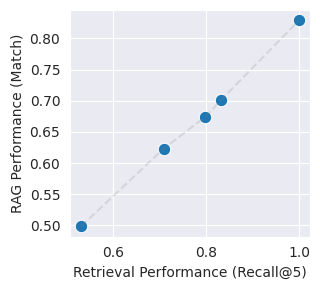

In [ ]:
# teaser

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
d = df[df['query_dataset'] == 'KILTNQ']
d = d[d['Generator'] == 'SOLAR-10.7B']
# d = d[d['Retrieval'] != 'Closed Book']
d = d[d['Retrieval'].isin(['BM25', 'BM25+RR', 'SPLADE-v3', 'SPLADE-v3+RR', 'Oracle'])]

d_ret_rag = pd.DataFrame({'ret': d['Retrieval'], 'r_5' : d['recall_5'],  'm': d['M']})
plt.figure(figsize=(3.3,3))
sns.scatterplot(data=d_ret_rag, x="r_5", y="m", legend=False, s=80)
sns.lineplot(data=d_ret_rag, x='r_5', y='m', linestyle='--', alpha=0.2, color='grey')

plt.tight_layout()
plt.ylabel('RAG Performance (Match)')
plt.xlabel('Retrieval Performance (Recall@5)')
plt.savefig('teaser.pdf')
plt.show()




In [ ]:
from google.colab import files
files.download('teaser.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

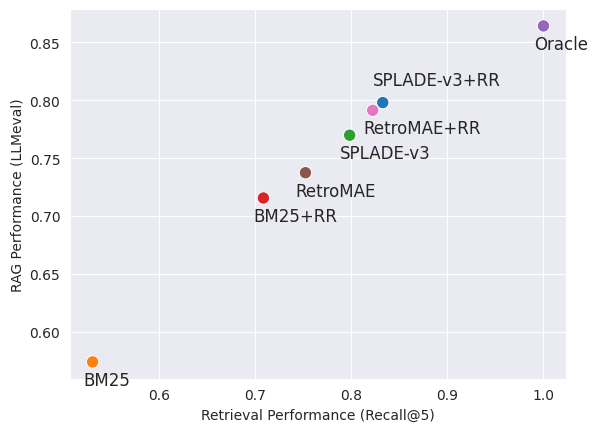

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
d = df[df['query_dataset'] == 'KILTNQ']
d = d[d['Generator'] == 'SOLAR-10.7B']
d = d[d['Retrieval'] != 'Closed Book']

d_ret_rag = pd.DataFrame({'ret': d['Retrieval'], 'r_5' : d['recall_5'],  'llmeval': d['vLLM_solq']})
plt.figure()
sns.scatterplot(data=d_ret_rag, x="r_5", y="llmeval", hue='ret', legend=False, s=80)

# Annotate each point with the 'ret' label
for index, row in d_ret_rag.iterrows():
    x = row['r_5']-0.01
    y = row['llmeval']-0.02
    if row['ret'] == 'SPLADE-v3+RR':
        y += 0.035
    plt.text(x, y , row['ret'], fontsize=12)
    plt.ylabel('RAG Performance (LLMeval)')
    plt.xlabel('Retrieval Performance (Recall@5)')

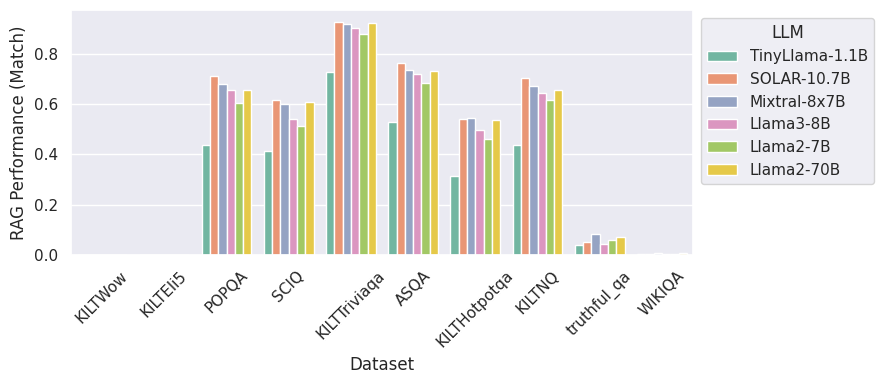

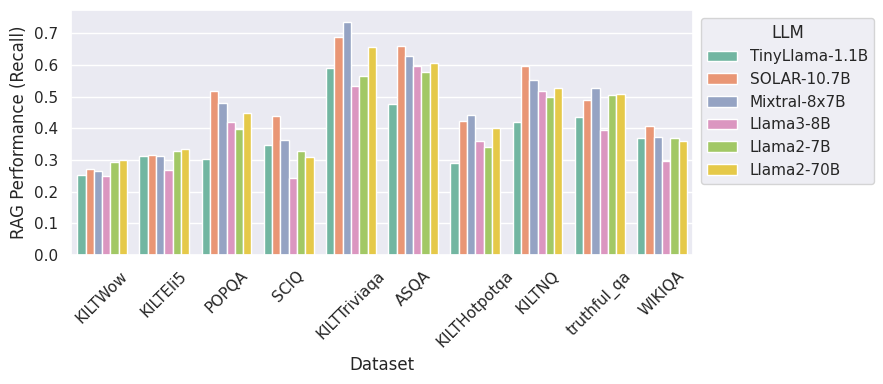

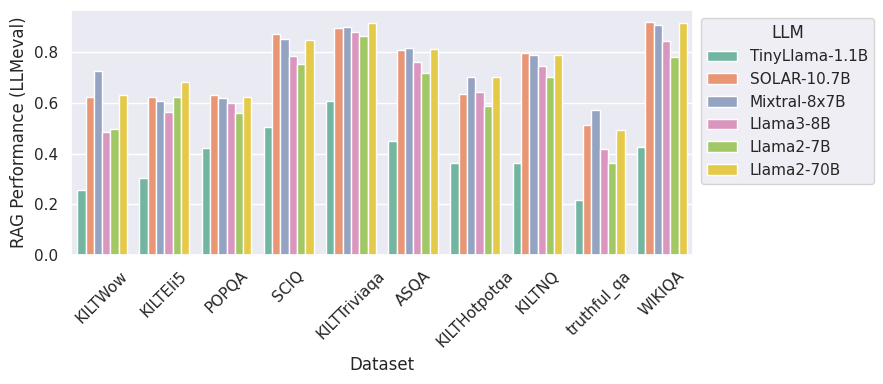

In [ ]:
metrics = ['M', 'R', 'vLLM_solq']
import itertools
for metric in metrics:
    df_ = df[df['Retrieval'] == 'SPLADE-v3+RR']
    df_ = pd.DataFrame({'LLM': df_['Generator'], 'RAG Performance': df_[metric], 'Dataset': df_['query_dataset']})
    df_ = df_.sort_values(by='LLM', ascending=False)
    plt.figure(figsize=(9,4))
    ax = sns.barplot(x="Dataset", y=f"RAG Performance", hue="LLM", data=df_, palette="Set2")
    #ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='white')
    ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
    #sns.despine(left=True, bottom=True)  # Remove the top and right spines
    plt.xticks(rotation=45)
    plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
    plt.legend(title="LLM", bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'dataset_all_{metric}.pdf')

    plt.show()


    # hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
    # for i, bar in enumerate(ax.patches):
    #     if i % num_locations == 0:
    #         hatch = next(hatches)
    #     bar.set_hatch(hatch)

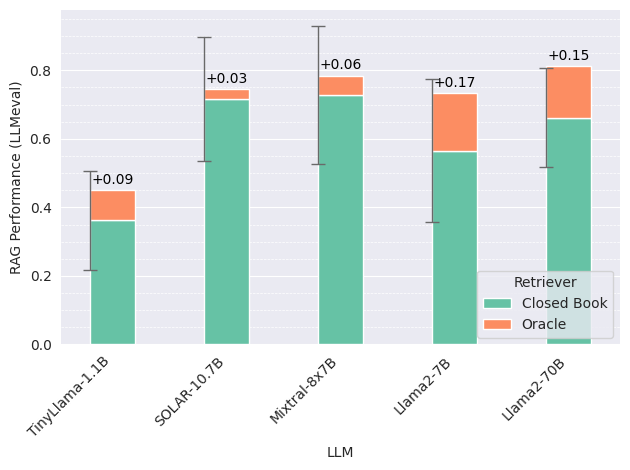

In [ ]:

datasets = ['KILTNQ']
metrics = ['vLLM_solq']
ref = 'Closed Book'
source = 'Oracle'
sns.set_palette(palette="Set2")
from matplotlib.ticker import MultipleLocator
for metric in metrics:
    df_ = pd.DataFrame({'LLM': df['Generator'], 'metric': df[metric], 'Retriever': df['Retrieval'], 'dataset': df['query_dataset']})
    comb_df = df_[df_['Retriever'].isin([source, ref])]
    comb_df = df_[df_['LLM'] != 'Llama3-8B']
    pivot_df = comb_df.pivot_table(index='LLM', columns='Retriever', values='metric')
    pivot_df_std = comb_df.pivot_table(index='LLM', columns='Retriever', values='metric', aggfunc='std')
    pivot_df[source] = pivot_df[source] - pivot_df[ref]
    pivot_df = pivot_df.sort_values(by='LLM', ascending=False)
    ax = pivot_df[[ref, source]].plot(kind='bar', stacked=True, width=0.4)
    for i, rect in enumerate(ax.patches[:5]):
        height = rect.get_height()
        d = pivot_df[source].iloc[i]
        ax.text(rect.get_x() + rect.get_width() / 2., height + d + 0.01 if d >= 0 else  d - 0.05, f'+{d:.2f}', ha='center', va='bottom', color='black', size=10)
        plt.errorbar(rect.get_x(), height, yerr=pivot_df_std[source].iloc[i], ecolor='dimgrey', elinewidth=1, capsize=5)

    ax.grid(axis='x', linestyle='')
    plt.xticks(rotation=45, ha='right')
    ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
    ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='white')
    plt.legend(title="Retriever", loc='lower right')
    #plt.legend(title='Retrieval', bbox_to_anchor=(1.05, 1), loc='upper right')
    plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
    sns.despine(left=True, bottom=True)  # Remove the top and right spines
    # plt.ylim(0, 0.6)
    plt.tight_layout()
    plt.savefig(f'llm_{source}_{metric}.pdf')
    plt.show()



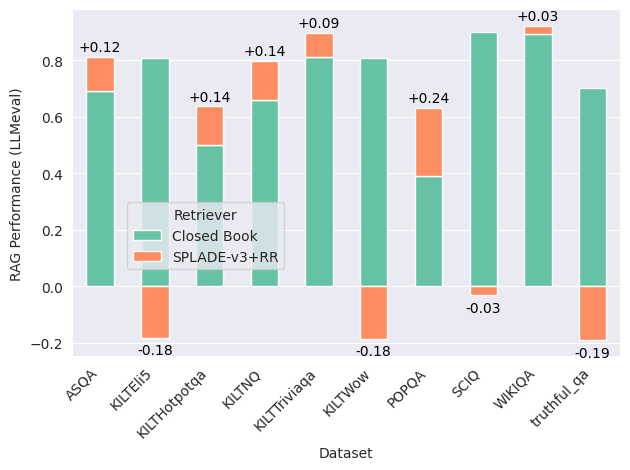

In [ ]:
metrics = ['R', 'M', 'vLLM_solq']
metrics = ['vLLM_solq']
ref = 'Closed Book'
source = 'SPLADE-v3+RR'
llm = 'SOLAR-10.7B'
sns.set_palette(palette="Set2")
from matplotlib.ticker import MultipleLocator
for metric in metrics:
    df_ = pd.DataFrame({'LLM': df['Generator'], 'metric': df[metric], 'Retriever': df['Retrieval'], 'Dataset': df['query_dataset']})
    df_ = df_[df_['LLM'] == llm]
    comb_df = df_[df_['Retriever'].isin([source, ref])]

    pivot_df = comb_df.pivot_table(index='Dataset', columns='Retriever', values='metric')
    pivot_df = pivot_df.sort_values(by='Dataset', ascending=True)
    #std = pivot_df_[source]
    pivot_df[source] = pivot_df[source] - pivot_df[ref]
    ax = pivot_df[[ref, source]].plot(kind='bar', stacked=True)
    for i, rect in enumerate(ax.patches[:10]):
        height = rect.get_height()
        d = pivot_df[source].iloc[i]
        text = f'+{d:.2f}' if d >= 0 else f'{d:.2f}'
        ax.text(rect.get_x() + rect.get_width() / 2., height + d + 0.01 if d >= 0 else  d - 0.07, text, ha='center', va='bottom', color='black', size=10)
    ax.grid(axis='x', linestyle='')
    plt.xticks(rotation=45, ha='right')
    ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
    # ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='white')
    #plt.legend(title='Retrieval', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(title="Retriever", loc=(.1,0.25))
    plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
    sns.despine(left=True, bottom=True)  # Remove the top and right spines
    plt.tight_layout()
    plt.savefig(f'dataset_{source}_{llm}_{metric}.pdf')
    plt.show()




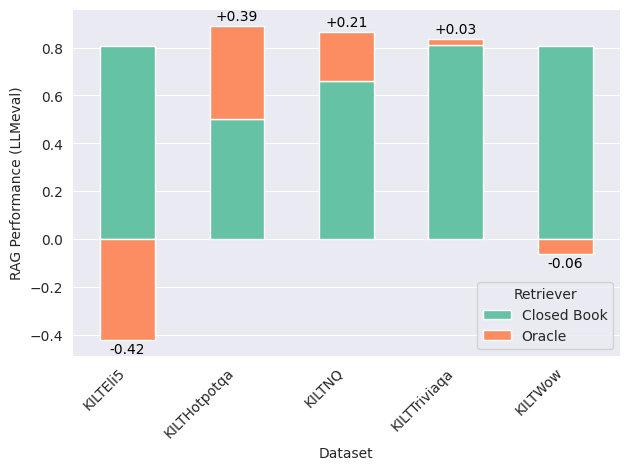

In [ ]:
metrics = ['R', 'M', 'vLLM_solq']
metrics = ['vLLM_solq']
ref = 'Closed Book'
source = 'Oracle'
llm = 'SOLAR-10.7B'
sns.set_palette(palette="Set2")
from matplotlib.ticker import MultipleLocator
for metric in metrics:
    df_ = pd.DataFrame({'LLM': df['Generator'], 'metric': df[metric], 'Retriever': df['Retrieval'], 'Dataset': df['query_dataset']})
    df_ = df_[df_['LLM'] == llm]

    comb_df = df_[df_['Dataset'].isin(['KILTEli5', 'KILTTriviaqa', 'KILTNQ', 'KILTHotpotqa', 'KILTWow'])]
    pivot_df = comb_df.pivot_table(index='Dataset', columns='Retriever', values='metric')
    pivot_df = pivot_df.sort_values(by='Dataset', ascending=True)
    #std = pivot_df_[source]
    pivot_df[source] = pivot_df[source] - pivot_df[ref]
    ax = pivot_df[[ref, source]].plot(kind='bar', stacked=True)
    for i, rect in enumerate(ax.patches[:5]):
        height = rect.get_height()
        d = pivot_df[source].iloc[i]
        text = f'+{d:.2f}' if d >= 0 else f'{d:.2f}'
        ax.text(rect.get_x() + rect.get_width() / 2., height + d + 0.01 if d >= 0 else  d - 0.07, text, ha='center', va='bottom', color='black', size=10)
    ax.grid(axis='x', linestyle='')
    plt.xticks(rotation=45, ha='right')
    ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
    # ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='white')
    #plt.legend(title='Retrieval', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(title="Retriever")
    plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
    sns.despine(left=True, bottom=True)  # Remove the top and right spines
    plt.tight_layout()
    plt.savefig(f'dataset_{source}_{llm}_{metric}_oracle.pdf')
    plt.show()




In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
x = df[['M', 'EM', 'F1', 'P', 'R', 'Rg-1', 'Rg-2', 'Rg-L', 'BEM', 'vLLM_solq']]
mask = np.triu(np.ones_like(x.corr()))
_ = sns.heatmap(x.corr(method ='kendall'),cmap="YlGnBu", annot=True, mask=mask, cbar=False)

['Closed Book', 'BM25', 'BM25+RR', 'RetroMAE', 'SPLADE-v3', 'RetroMAE+RR', 'SPLADE-v3+RR', 'Oracle']


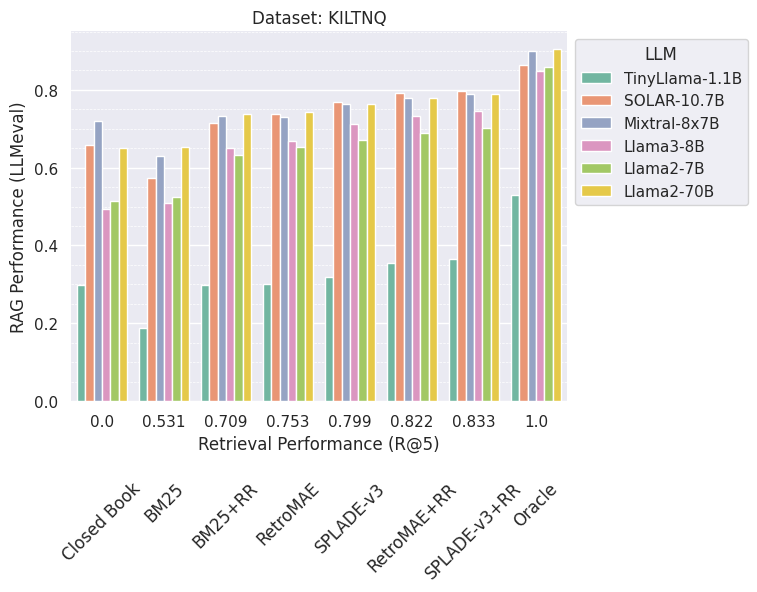

['Closed Book', 'RetroMAE', 'BM25', 'RetroMAE+RR', 'SPLADE-v3', 'BM25+RR', 'SPLADE-v3+RR', 'Oracle']


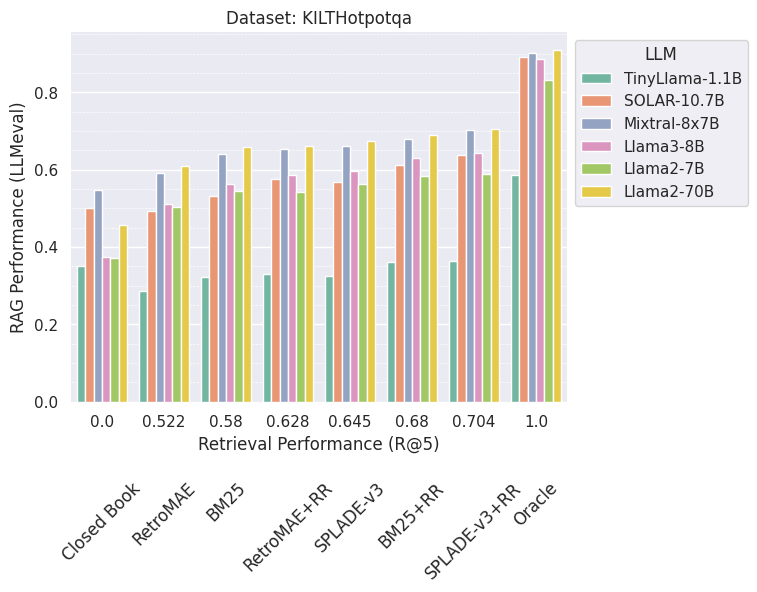

['Closed Book', 'BM25', 'BM25+RR', 'SPLADE-v3', 'RetroMAE', 'RetroMAE+RR', 'SPLADE-v3+RR', 'Oracle']


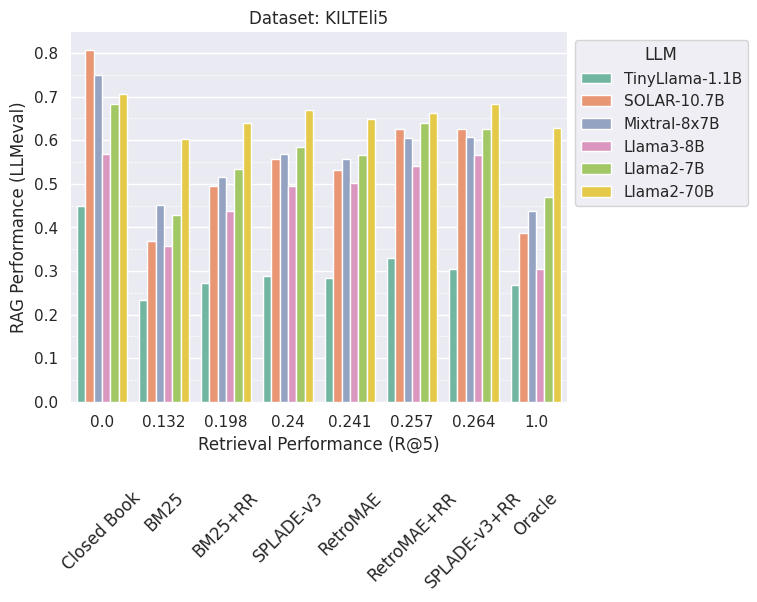

['Closed Book', 'BM25', 'RetroMAE', 'BM25+RR', 'SPLADE-v3', 'RetroMAE+RR', 'SPLADE-v3+RR', 'Oracle']


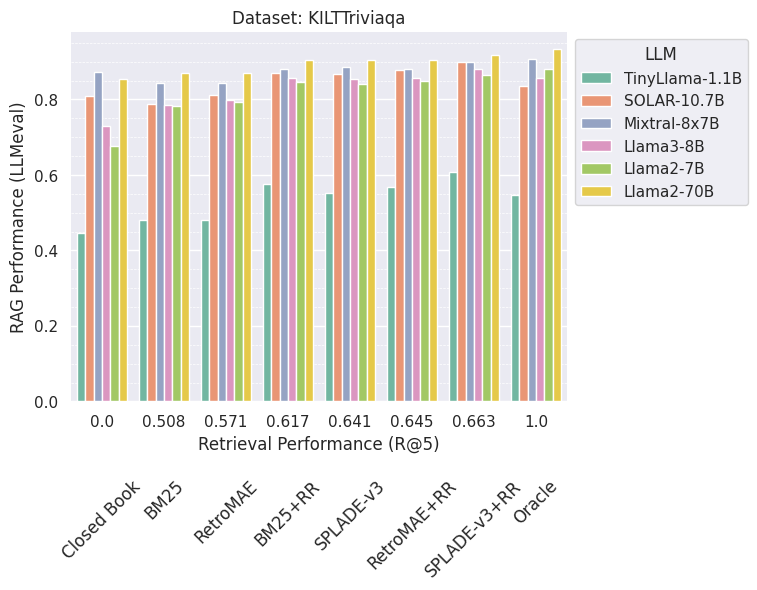

['Closed Book', 'BM25', 'BM25+RR', 'RetroMAE', 'RetroMAE+RR', 'SPLADE-v3+RR', 'SPLADE-v3', 'Oracle']


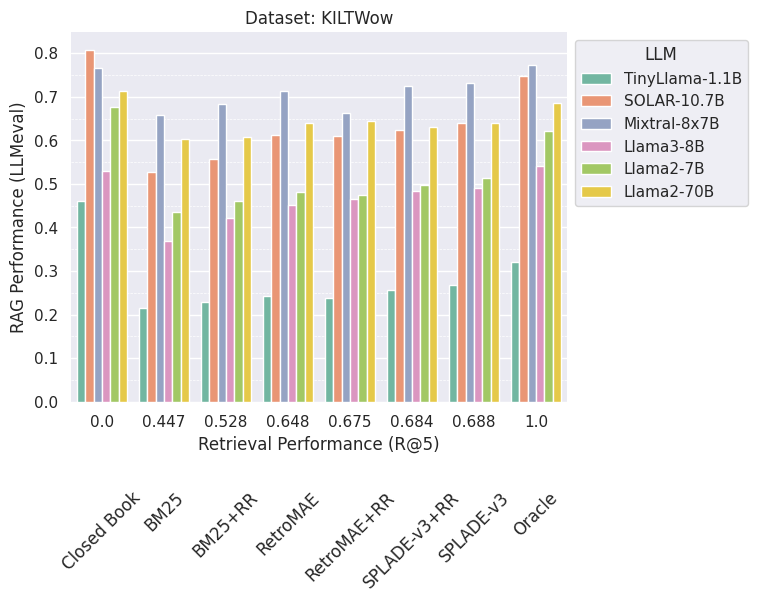

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MultipleLocator

# Define the list of hatches
hatches = ['++', '--', 'xxx', '//', '||']
datasets = ['KILTNQ', 'KILTHotpotqa', 'KILTEli5', 'KILTTriviaqa', 'KILTWow']
# metrics = ['Mix7b', 'M', 'R']
metrics = ['vLLM_solq']
# Your plotting loop
for dataset in datasets:
    for metric in metrics:
        nq = df[df['query_dataset'] == dataset]
        nq = nq[nq['Retriever'] != 'No Retr.']
        nq_df = pd.DataFrame({'retrieval': nq['recall_5'].round(3), 'LLM': nq['Generator'], 'RAG Performance': nq[metric].round(4), 'Retrieval': nq['Retrieval'],'exp': nq['exp_folder'] })
        nq_df = nq_df.sort_values(by='LLM', ascending=False)
        # nq_df = nq_df.apply(lambda l: func(df['query_dataset'], l))
        retrievers = [el[1] for el in sorted(list(set(zip(nq_df['retrieval'].tolist(), nq_df['Retrieval'].tolist()))), key=lambda l: l[0])]
        print(retrievers)
        plt.figure()
        ax = sns.barplot(data=nq_df, x="retrieval", y="RAG Performance", hue="LLM", palette="Set2")
        plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
        #print(nq_df.sort_values(by='Retrieval').to_string())
        # # Add different hatches for each bar within one group but consistent between groups
        # for i, bar in enumerate(ax.patches):
        #     bar.set_hatch(hatches[i % len(hatches)])

        for i, retriever in enumerate(retrievers):
            plt.text(i, -0.2, retriever, ha='center', va='top', rotation=45)
        plt.title(f'Dataset: {dataset}')
        #plt.text(len(retrievers) / 2 - 0.5, -0.2, "Retrieval Performance (R@5)", ha='center')
        plt.xlabel('Retrieval Performance (R@5)')
        # plt.legend(title="LLM", bbox_to_anchor=(1, 1), loc='upper left')
        #plt.legend(title="LLM", bbox_to_anchor=(1, 1), loc='upper left')
        #plt.ylim(0,1)
        # Adjust the horizontal grid
        plt.legend(title="LLM", bbox_to_anchor=(1, 1), loc='upper left')
        ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='white')
        ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
        sns.despine(left=True, bottom=True)  # Remove the top and right spines

        plt.savefig(f'rag_ret_{dataset}_{metric}.pdf')
        plt.show()


In [ ]:
from google.colab import files
files.download('dataset_Oracle_SOLAR-10.7B_vLLM_solq_oracle.pdf')
files.download('dataset_splade-v3+RR_SOLAR-10.7B_R.pdf')
files.download('rag_ret_KILTNQ_R.pdf')
files.download('dataset_all_vLLM_solq.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# old working one


# correlation gpt-4



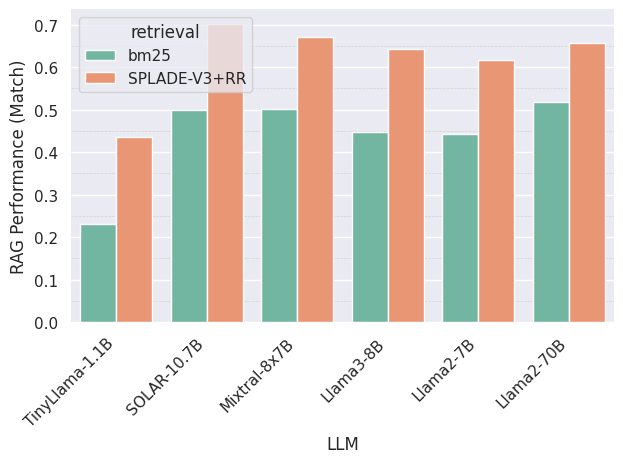

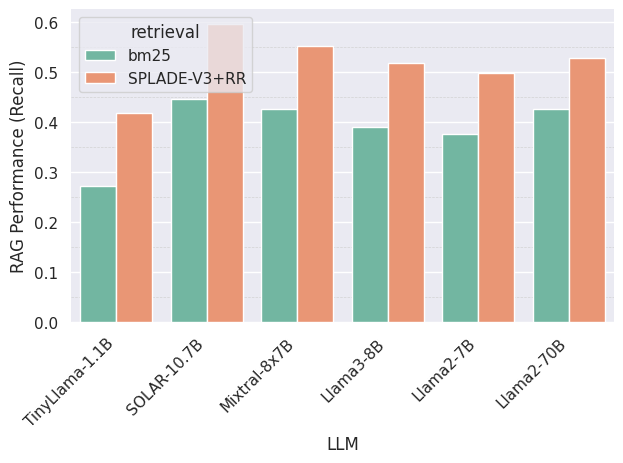

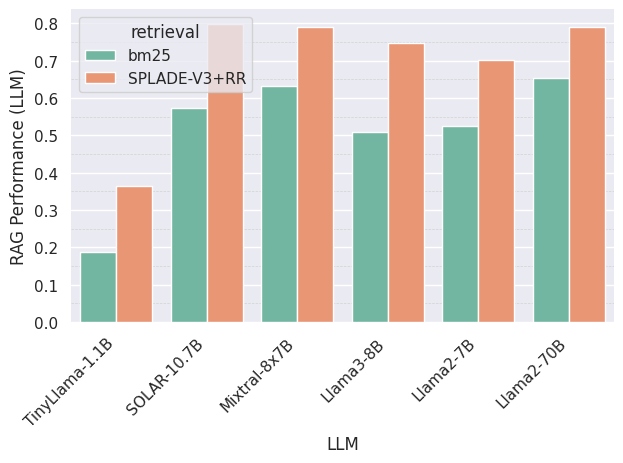

In [ ]:
sdatasets = ['KILTNQ']
metrics = ['M', 'R', 'vLLM_solq']

for dataset in datasets:
    for metric in metrics:
        df_ = df[df['query_dataset'] == dataset]
        df_ = pd.DataFrame({'LLM': df_['Generator'], 'metric': df_[metric], 'retrieval': df_['Retrieval']})
        df_ = df_.sort_values(by='LLM', ascending=False)
        # no_ret = df_[df_['retrieval'] == 'bm25']
        # ret = df_[df_['retrieval'] == 'splade-v3+RR']
        comb_df = df_[df_['retrieval'].isin(['SPLADE-V3+RR', 'bm25'])]
        ax = sns.barplot(comb_df, y='metric', x='LLM', hue='retrieval', palette="Set2")
        plt.xticks(rotation=45, ha='right')
        ax.yaxis.grid(True, which='minor', linestyle='--', linewidth=0.5, color='lightgray')
        ax.yaxis.set_minor_locator(MultipleLocator(.05))  # Set minor ticks every 0.05
        plt.ylabel(f"RAG Performance ({metrics_map[metric]})")
        sns.despine(left=True, bottom=True)  # Remove the top and right spines
        plt.tight_layout()
        plt.show()


In [ ]:
!pip3 install rouge
!pip3 install omegaconf

# evaluate runs

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import f1_score
import string
import regex
import numpy as np
from rouge import Rouge
from collections import Counter

# partly copied from https://github.com/facebookresearch/atlas/blob/0ec8889492d5187b26c51b8d1781239a4cf6741e/src/evaluation.py

rouge = Rouge()


def simple_accuracy(preds, labels):
    return float((preds == labels).mean())


def acc_and_f1(preds, labels):
    acc = simple_accuracy(preds, labels)
    f1 = float(f1_score(y_true=labels, y_pred=preds))
    return {
        "accuracy": acc,
        "f1": f1,
    }


def normalize(s: str) -> str:
    def remove_articles(text):
        return regex.sub(r"\b(a|an|the)\b", " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_punc(lower(s)))



def f1_single(prediction, ground_truth):
    prediction_tokens = normalize(prediction).split()
    ground_truth_tokens = normalize(ground_truth).split()
    common = Counter(prediction_tokens) & Counter(ground_truth_tokens)
    num_same = sum(common.values())

    if num_same == 0:
        return 0, 0, 0
    precision = 1.0 * num_same / len(prediction_tokens)
    recall = 1.0 * num_same / len(ground_truth_tokens)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1, precision, recall

def rouge_wrapper(prediction, ground_truth):
    try:
        result = rouge.get_scores(prediction, ground_truth, avg=True)
        return result["rouge-1"]["f"], result["rouge-2"]["f"], result["rouge-l"]["f"]
    except:
        return 0.0, 0.0, 0.0


def rouge_score_single(prediction, ground_truths):
    ground_truths = [normalize(x) for x in ground_truths if len(x) > 0]
    if len(prediction) == 0 or len(ground_truths) == 0:
        # check if empty prediction or if there is no hypothesis with len > 0
        return 0.0, 0.0, 0.0
    scores = [rouge_wrapper(prediction, gt) for gt in ground_truths]
    rouge1 = max(s[0] for s in scores)
    rouge2 = max(s[1] for s in scores)
    rougel = max(s[2] for s in scores)
    return rouge1, rouge2, rougel

def rouge_score(predictions, references, mean=True):
    rouge1, rouge2, rougel = list(), list(), list()
    for ground_truths, predicition in zip(references, predictions):
        rouge1_, rouge2_, rougel_ = rouge_score_single(normalize(predicition), ground_truths)
        rouge1.append(rouge1_)
        rouge2.append(rouge2_)
        rougel.append(rougel_)
        rouge1 = np.mean(rouge1) if mean else rouge1
        rouge2 = np.mean(rouge2) if mean else rouge2
        rougel = np.mean(rougel) if mean else rougel
    return rouge1, rouge2, rougel


def f1_score(predictions, references, mean=True):
    f1, precision, recall = list(), list(), list()
    for ground_truths, prediction in zip(references, predictions):
        f1_, precision_, recall_ = [max(values) for values in zip(*[f1_single(prediction, gt) for gt in ground_truths])]
        f1.append(f1_)
        precision.append(precision_)
        recall.append(recall_)
    f1 = np.mean(f1) if mean else f1
    precision = np.mean(precision) if mean else precision
    recall = np.mean(recall) if mean else recall
    return f1, precision, recall

def em_single(prediction, ground_truth):
    return float(normalize(prediction) == normalize(ground_truth))


def exact_match_score(predictions, references, mean=True):
    score = [max([em_single(prediction, gt) for gt in ground_truths]) for ground_truths, prediction in zip(references, predictions)]
    score = np.mean(score) if mean else score
    return score

def match_single(prediction, ground_truth):
    return float(normalize(ground_truth) in normalize(prediction))

def match_score(predictions, references, mean=True):
    score = [max([match_single(prediction, gt) for gt in ground_truths]) for ground_truths, prediction in zip(references, predictions)]
    score = np.mean(score) if mean else score
    return score

def load(js):
    labels, responses = list(), list()
    for i in range(len(js)):
        label = js[i]['label']
        response = js[i]['response']
        labels.append(label)
        responses.append(response)
    return labels, responses


In [ ]:
!wget http://bashupload.com/IdQJ_/wmb2e.gz
!tar xzvf wmb2e.gz
# !mv YMxiL eval_openai2

--2024-05-27 13:39:26--  http://bashupload.com/IdQJ_/wmb2e.gz
Resolving bashupload.com (bashupload.com)... 116.203.186.178
Connecting to bashupload.com (bashupload.com)|116.203.186.178|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50935696 (49M) [application/gzip]
Saving to: ‘wmb2e.gz.1’

wmb2e.gz.1          100%[===================>]  48.58M  18.4MB/s    in 2.6s    

2024-05-27 13:39:29 (18.4 MB/s) - ‘wmb2e.gz.1’ saved [50935696/50935696]

eval_openai_my_prompt/
eval_openai_my_prompt/vllm_3278117/
eval_openai_my_prompt/vllm_3278117/eval_dev_reranking_metrics.json
eval_openai_my_prompt/vllm_3278117/eval_dev_generation_time.json
eval_openai_my_prompt/vllm_3278117/eval_dev_metrics_BEM_out.json
eval_openai_my_prompt/vllm_3278117/config.yaml
eval_openai_my_prompt/vllm_3278117/eval_dev_metrics_vLLM_solq_out.json
eval_openai_my_prompt/vllm_3278117/eval_dev_ranking_metrics.json
eval_openai_my_prompt/vllm_3278117/eval_dev_cost_gpt-4_out.json
eval_openai_my_prompt/vll

In [ ]:
import os
import json
import pandas as pd
import seaborn as sns
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
path = 'eval_openai_my_prompt'
gpt4_file = 'eval_dev_metrics_gpt-4_out.json'
solar_file = 'eval_dev_metrics_vLLM_solq_out.json'
gpt35_file = 'eval_dev_metrics_gpt-3.5-turbo_out.json'
bem_file = 'eval_dev_metrics_BEM_out.json'
out = 'eval_dev_out.json'
split = 'dev'

corr_with_gpt_4 = list()
for folder in os.listdir(path):
    print(folder)
    scores_gpt4, scores_solar, scores_gpt35, scores_bem= list(), list(), list(), list()
    config = OmegaConf.load(f'{path}/{folder}/config.yaml')
    dataset = config['dataset'][split]['query']['init_args']['_target_'].replace('modules.dataset_processor.', '')
    for l_gpt4, l_solar, l_gpt35, l_bem in zip(open(f'{path}/{folder}/{gpt4_file}'), open(f'{path}/{folder}/{solar_file}'), open(f'{path}/{folder}/{gpt35_file}'), open(f'{path}/{folder}/{bem_file}')):

        js_gpt4 = json.loads(l_gpt4)
        scores_gpt4.append(js_gpt4['score'])

        js_solar = json.loads(l_solar)
        scores_solar.append(js_solar['score'])

        js_bem = json.loads(l_bem)
        scores_bem.append(js_bem['score'])

        js_gpt35 = json.loads(l_gpt35)
        scores_gpt35.append(js_gpt35['score'])

        assert js_solar['question'] == js_gpt4['question']
    js = json.loads(open(f'{path}/{folder}/{out}').read())
    labels, responses = load(js)
    scores_m = match_score(responses, labels, mean=False)
    scores_em = exact_match_score(responses, labels, mean=False)
    scores_f1, scores_precision, scores_recall = f1_score(responses, labels, mean=False)
    _, _, scores_rouge = rouge_score(responses, labels, mean=False)

    df_corr = pd.DataFrame({'GPT-4': scores_gpt4,'GPT-3.5Turbo': scores_gpt35, 'LLMeval': scores_solar, 'BEM': scores_bem, 'Match': scores_m, 'EM': scores_em, 'F1': scores_f1, 'Recall': scores_recall, 'Precision': scores_precision, 'Rouge-L': scores_rouge})
    corr_with_gpt_4.append((dataset, df_corr.corr(method ='kendall')['GPT-4']))

vllm_3278121
vllm_3278120
vllm_3278117
vllm_3278125


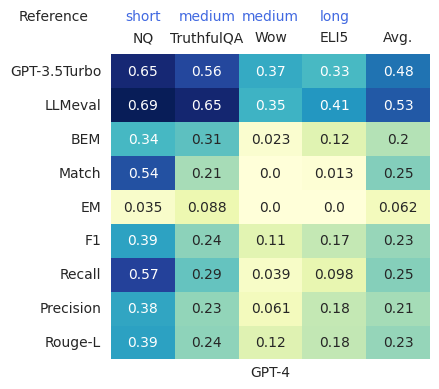

In [ ]:
df_comb = pd.concat([corr_with_gpt_4[2][1], corr_with_gpt_4[3][1],corr_with_gpt_4[1][1], corr_with_gpt_4[0][1] ], axis=1)
df_comb['Average'] = df_comb.mean(1)
df_comb.columns = ['NQ', 'TruthfulQA', 'Wow', 'ELI5', 'Avg.']
df_comb = df_comb.iloc[1:]
df_comb = df_comb.fillna(0)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(4.5,4))
plt.text(0.5, -1, 'short', fontsize=10, ha='center', color='royalblue')
plt.text(1.5, -1, 'medium', fontsize=10, ha='center', color='royalblue')
plt.text(2.5, -1, 'medium', fontsize=10, ha='center', color='royalblue')
plt.text(3.5, -1, 'long', fontsize=10, ha='center', color='royalblue')
plt.text(-.9, -1, 'Reference', fontsize=10, ha='center')

ax = sns.heatmap(df_comb,cmap="YlGnBu", annot=True, cbar=False, fmt=".2")
# ax.xaxis.tick_top() # x axis on top
#ax.xaxis.set_label_position('top')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xlabel('GPT-4')
plt.tight_layout()
plt.savefig('metrics_pearson.pdf')


In [ ]:
from google.colab import files
files.download('metrics_pearson.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>